# Comprehensive Treatment Pattern Analysis

This notebook demonstrates the complete pipeline combining:
1. Age-matched feature building
2. Observational pattern learning with matched controls
3. Bayesian propensity-response modeling

Author: Sarah Urbut  
Date: 2025-07-15

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")
import sys
sys.path.append('scripts')
%load_ext autoreload

%autoreload 2

print("Libraries imported successfully!")


Libraries imported successfully!


## 1. Load Data

Load your signature data, patient IDs, prescription data, and covariates.

In [3]:
import numpy as np
import pandas as pd
import sys
sys.path.append('scripts')
thetas = np.load("/Users/sarahurbut/aladynoulli2/pyScripts/thetas.npy")
processed_ids = np.load("/Users/sarahurbut/aladynoulli2/pyScripts/processed_patient_ids.npy").astype(int)
cov = pd.read_csv('/Users/sarahurbut/aladynoulli2/pyScripts/matched_pce_df_400k.csv')


cov.columns = cov.columns.str.strip()
cov = cov.rename(columns={cov.columns[0]: 'eid'})
cov['eid'] = cov['eid'].astype(int)

covariate_dicts = {'age': dict(zip(cov['eid'], 2025 - cov['birth_year']))}



In [4]:
from scripts.statin_utils import *
# thetas: shape (N, n_signatures, n_timepoints)
mean_thetas = thetas.mean(axis=0)  # shape: (n_signatures, n_timepoints)
std_thetas = thetas.std(axis=0)    # shape: (n_signatures, n_timepoints)

import pandas as pd
import torch
Y=torch.load('/Users/sarahurbut/Library/CloudStorage/Dropbox-Personal/data_for_running/Y_tensor.pt')
Y.shape
# Broadcasting: (N, n_signatures, n_timepoints) - (n_signatures, n_timepoints)
z_thetas = (thetas - mean_thetas[None, :, :]) / std_thetas[None, :, :]

# statins = pd.read_csv('path/to/your/statin_prescriptions.csv')
# Load covariate data (demographics, labs, etc.)
cov = pd.read_csv('/Users/sarahurbut/aladynoulli2/pyScripts/matched_pce_df_400k.csv')
cov.columns = cov.columns.str.strip()
cov = cov.rename(columns={cov.columns[0]: 'eid'})
cov['eid'] = cov['eid'].astype(int)


# Usage:
prescription_path = '/Users/sarahurbut/Library/CloudStorage/Dropbox-Personal/gp_scripts.txt'
gp_scripts = pd.read_csv(prescription_path, sep='\t')


In [5]:
# Then load with:
true_statins = pd.read_csv('true_statins.csv')
cov = pd.read_csv('cov.csv')
prescription_patient_ids = set(gp_scripts['eid'].unique())

from scripts.observational_treatment_patterns import ObservationalTreatmentPatternLearner

learner = ObservationalTreatmentPatternLearner(
    signature_loadings=thetas,
    processed_ids=processed_ids, 
    statin_prescriptions=true_statins,
    covariates=cov,
    gp_scripts=gp_scripts
)

treated_eids = learner.treatment_patterns['treated_patients']
treated_times = learner.treatment_patterns['treatment_times']
never_treated_eids = learner.treatment_patterns['never_treated']

Found 53514 treated patients
Found 116131 never-treated patients


In [7]:
def export_eligible_patients_before_matching(treated_eids_matched, control_eids_matched, 
                                           covariate_dicts, output_file="eligible_patients_before_matching.csv"):
    """
    Export eligible patients AFTER exclusions but BEFORE matching
    """
    print("Exporting eligible patients before matching...")
    
    eligible_data = []
    
    # Add treated patients (eligible after exclusions)
    for eid in treated_eids_matched:
        age = covariate_dicts['age_at_enroll'].get(int(eid))
        sex = covariate_dicts['sex'].get(int(eid))
        dm2 = covariate_dicts['dm2_prev'].get(int(eid))
        antihtn = covariate_dicts['antihtnbase'].get(int(eid))
        pce = covariate_dicts['pce_goff'].get(int(eid))
        
        eligible_data.append({
            'eid': eid,
            'group': 'eligible_treated',
            'age_at_enroll': age,
            'sex': sex,
            'dm2_prev': dm2,
            'antihtnbase': antihtn,
            'pce_goff': pce
        })
    
    # Add control patients (eligible after exclusions)
    for eid in control_eids_matched:
        age = covariate_dicts['age_at_enroll'].get(int(eid))
        sex = covariate_dicts['sex'].get(int(eid))
        dm2 = covariate_dicts['dm2_prev'].get(int(eid))
        antihtn = covariate_dicts['antihtnbase'].get(int(eid))
        pce = covariate_dicts['pce_goff'].get(int(eid))
        
        eligible_data.append({
            'eid': eid,
            'group': 'eligible_control',
            'age_at_enroll': age,
            'sex': sex,
            'dm2_prev': dm2,
            'antihtnbase': antihtn,
            'pce_goff': pce
        })
    
    df = pd.DataFrame(eligible_data)
    df.to_csv(output_file, index=False)
    print(f"✅ Exported {len(df)} eligible patients to {output_file}")
    
    return df

    
export_eligible_patients_before_matching(treated_eids, never_treated_eids, 
                                           covariate_dicts, output_file="eligible_patients_before_matching.csv")
   

Exporting eligible patients before matching...


KeyError: 'age_at_enroll'

## 2. Clean and Prepare Statin Data

In [6]:
# Then load with:
true_statins = pd.read_csv('true_statins.csv')
cov = pd.read_csv('cov.csv')
prescription_patient_ids = set(gp_scripts['eid'].unique())

## 3. Prepare Covariate Dictionary for Matching

In [8]:
del simple_treatment_analysis

NameError: name 'simple_treatment_analysis' is not defined

In [37]:
import torch as torch
from dt import *
import pandas as pd
# this will make the covariate dictionaries
from scripts.make_covariate_dicts import *
# Import and run the simple treatment analysis with your variables
from scripts.simple_treatment_analysis import *


In [ ]:



print(f"Y shape: {Y.shape}")
print(f"processed_ids length: {len(processed_ids)}")
print(f"First few processed_ids: {processed_ids[:5]}")

#from comprehensive_treatment_analysis import *
sig_indices=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
# Now run the analysis with outcomes
# Run the simplified treatment analysis
statin_results = simple_treatment_analysis(
    gp_scripts=gp_scripts,
    true_statins=true_statins, 
    processed_ids=processed_ids,
    thetas=thetas,
    sig_indices=sig_indices,
    covariate_dicts=covariate_dicts,
    Y=Y,
    event_indices=[112, 113, 114, 115, 116],  # ASCVD composite events
    cov=cov
)

In [60]:
# Get the restrictive result (HR ≈ 1.000)
results_restrictive = simple_treatment_analysis(
    gp_scripts=gp_scripts,
    true_statins=true_statins, 
    processed_ids=processed_ids,
    thetas=thetas,
    sig_indices=sig_indices,
    covariate_dicts=covariate_dicts,
    Y=Y,
    event_indices=[112, 113, 114, 115, 116],  # ASCVD composite events
    cov=cov,restrictive_followup=True)

=== SIMPLIFIED TREATMENT ANALYSIS WITH SELF-CHECKING ===
Every step is verified and transparent

1. Verifying patient cohort definitions:
Patients with complete data: 178,317
All statin patients: 70,329
Treated cohort (complete data + statins): 62,186
Control cohort (complete data - statins): 116,131
✅ No overlap between treated and control cohorts

2. Extracting treated patients using ObservationalTreatmentPatternLearner:
Found 53514 treated patients
Found 116131 never-treated patients
   Treated patients from learner: 53,514
   Never-treated patients from learner: 116,131

=== TREATED PATIENT VERIFICATION ===
Claimed treated patients: 53,514
  - With statins: 53,514
  - Without statins: 0
✅ All treated patients have statins

3. Defining clean controls:
   Found 116131 never-treated patients with signature data

=== CONTROL PATIENT VERIFICATION ===
Claimed control patients: 116,131
  - With statins: 0
  - Without statins: 116,131
✅ All controls are clean (no statins)
   Control patien

In [39]:
# Get the restrictive result (HR ≈ 1.000)
results_restrictive = simple_treatment_analysis(
    gp_scripts=gp_scripts,
    true_statins=true_statins, 
    processed_ids=processed_ids,
    thetas=thetas,
    sig_indices=sig_indices,
    covariate_dicts=covariate_dicts,
    Y=Y,
    event_indices=[112, 113, 114, 115, 116],  # ASCVD composite events
    cov=cov,restrictive_followup=False)


=== SIMPLIFIED TREATMENT ANALYSIS WITH SELF-CHECKING ===
Every step is verified and transparent

1. Verifying patient cohort definitions:
Patients with complete data: 178,317
All statin patients: 70,329
Treated cohort (complete data + statins): 62,186
Control cohort (complete data - statins): 116,131
✅ No overlap between treated and control cohorts

2. Extracting treated patients using ObservationalTreatmentPatternLearner:
Found 53514 treated patients
Found 116131 never-treated patients
   Treated patients from learner: 53,514
   Never-treated patients from learner: 116,131

=== TREATED PATIENT VERIFICATION ===
Claimed treated patients: 53,514
  - With statins: 53,514
  - Without statins: 0
✅ All treated patients have statins

3. Defining clean controls:
   Found 116131 never-treated patients with signature data

=== CONTROL PATIENT VERIFICATION ===
Claimed control patients: 116,131
  - With statins: 0
  - Without statins: 116,131
✅ All controls are clean (no statins)
   Control patien

In [49]:
enroll_age = covariate_dicts.get('age_at_enroll', {}).get(int(4208215))
print(enroll_age)

51.3238584474886


In [45]:
results_restrictive['matched_patients']['control_eids'][0:10]

[5139347,
 5104676,
 2109255,
 4939500,
 5863997,
 4208215,
 5916079,
 5346480,
 4117867,
 4198262]

In [46]:
results_restrictive['treatment_times']['control_times'][0:10]

[32, 32, 30, 31, 36, 21, 32, 32, 31, 35]

In [ ]:
from scripts.observational_treatment_patterns import ObservationalTreatmentPatternLearner

# Check if we have the required data for OTPL
if 'cov' in locals() and cov is not None:
    otpl = ObservationalTreatmentPatternLearner(
        signature_loadings=thetas,
        processed_ids=processed_ids,
        statin_prescriptions=true_statins,
        covariates=cov,
        gp_scripts=gp_scripts
    )

    
    # Get the treatment patterns from the OTPL
    patterns = otpl.treatment_patterns
    treated_eids = patterns['treated_patients']
    treated_treatment_times = patterns['treatment_times']
    control_eids = patterns['never_treated']
    
    # For treated patients, t0 is treatment time
    treated_t0s = treated_treatment_times.copy()
  
            


# Now calculate control timing once for both paths
control_t0s = []
valid_control_eids = []

for eid in control_eids:
    try:
        age_at_enroll = covariate_dicts['age_at_enroll'].get(int(eid))
        if age_at_enroll is not None and not np.isnan(age_at_enroll):
            t0 = int(age_at_enroll - 30)
            if t0 >= 10:
                control_t0s.append(t0)
                valid_control_eids.append(eid)
    except:
        continue

control_eids = valid_control_eids

event_indices=[112, 113, 114, 115, 116]
print("2. Building features with exclusions...")
treated_features, treated_indices, kept_treated_eids = build_features(
    treated_eids, treated_t0s, processed_ids, thetas, covariate_dicts, 
    sig_indices, is_treated=True, treatment_dates=treated_treatment_times,
    Y=Y, event_indices=event_indices
)

control_features, control_indices, kept_control_eids = build_features(
    control_eids, control_t0s, processed_ids, thetas, covariate_dicts, 
    sig_indices, is_treated=False, Y=Y, event_indices=event_indices
)



print(f"   Treated patients after exclusions: {len(treated_features):,}")

print(f"   Control patients after exclusions: {len(control_features):,}")

if len(treated_features) == 0 or len(control_features) == 0:
    print("Error: No patients left after exclusions")

 

# VERIFICATION: Check for statin contamination in control group
print("3. Verifying control group purity...")
control_statin_check = 0
for eid in kept_control_eids:
    if eid in true_statins:
        control_statin_check += 1
        print(f"   WARNING: Control patient {eid} has statin prescription!")

if control_statin_check > 0:
    print(f"   ⚠️ Found {control_statin_check} controls with statin prescriptions - contamination!")
else:
    print("   ✅ No statin contamination in control group")


    # VERIFICATION: Check covariate balance before matching
    print("4. Assessing covariate balance before matching...")
    if len(treated_features) > 0 and len(control_features) > 0:
        # Calculate means for key covariates
        treated_age_mean = np.mean(treated_features[:, -2])  # Age is second to last
        treated_sex_mean = np.mean(treated_features[:, -1])  # Sex is last
        control_age_mean = np.mean(control_features[:, -2])
        control_sex_mean = np.mean(control_features[:, -1])
        
        print(f"   BEFORE MATCHING:")
        print(f"   Treated: Age={treated_age_mean:.1f}, Sex(Male)={treated_sex_mean*100:.1f}%")
        print(f"   Control: Age={control_age_mean:.1f}, Sex(Male)={control_sex_mean*100:.1f}%")
        print(f"   Age difference: {abs(treated_age_mean - control_age_mean):.1f} years")
        print(f"   Sex difference: {abs(treated_sex_mean - control_sex_mean)*100:.1f}%")
    
    # Perfor


print("5. Performing matching...")

matched_treated_indices, matched_control_indices, matched_treated_eids, matched_control_eids = perform_greedy_1to1_matching_fast(
    treated_features, control_features, treated_indices, control_indices,
    kept_treated_eids, kept_control_eids
)
   

matched_pairs = list(zip(range(len(matched_treated_indices)), range(len(matched_control_indices))))

Found 53514 treated patients
Found 116131 never-treated patients
2. Building features with exclusions...
Processing 53514 patients with sig_indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Processed 0 patients, kept 0 so far
Processed 1000 patients, kept 836 so far
Processed 2000 patients, kept 1671 so far
Processed 3000 patients, kept 2506 so far
Processed 4000 patients, kept 3337 so far
Processed 5000 patients, kept 4194 so far
Processed 6000 patients, kept 5023 so far
Processed 7000 patients, kept 5851 so far
Processed 8000 patients, kept 6691 so far
Processed 9000 patients, kept 7536 so far
Processed 10000 patients, kept 8369 so far
Processed 11000 patients, kept 9205 so far
Processed 12000 patients, kept 10058 so far
Processed 13000 patients, kept 10900 so far
Processed 14000 patients, kept 11732 so far
Processed 15000 patients, kept 12567 so far
Processed 16000 patients, kept 13390 so far
Processed 17000 patients, kept 14214 so far
Processed 1800

In [ ]:
from scripts.observational_treatment_patterns import ObservationalTreatmentPatternLearner

# Check if we have the required data for OTPL
if 'cov' in locals() and cov is not None:
    otpl = ObservationalTreatmentPatternLearner(
        signature_loadings=thetas,
        processed_ids=processed_ids,
        statin_prescriptions=true_statins,
        covariates=cov,
        gp_scripts=gp_scripts
    )

    
    # Get the treatment patterns from the OTPL
    patterns = otpl.treatment_patterns
    treated_eids = patterns['treated_patients']
    treated_treatment_times = patterns['treatment_times']
    control_eids = patterns['never_treated']
    
    # For treated patients, t0 is treatment time
    treated_t0s = treated_treatment_times.copy()
  
            


# Now calculate control timing once for both paths
control_t0s = []
valid_control_eids = []

for eid in control_eids:
    try:
        age_at_enroll = covariate_dicts['age_at_enroll'].get(int(eid))
        if age_at_enroll is not None and not np.isnan(age_at_enroll):
            t0 = int(age_at_enroll - 30)
            if t0 >= 10:
                control_t0s.append(t0)
                valid_control_eids.append(eid)
    except:
        continue

control_eids = valid_control_eids

event_indices=[112, 113, 114, 115, 116]
print("2. Building features with exclusions...")
treated_features, treated_indices, kept_treated_eids = build_features(
    treated_eids, treated_t0s, processed_ids, thetas, covariate_dicts, 
    sig_indices, is_treated=True, treatment_dates=treated_treatment_times,
    Y=Y, event_indices=event_indices
)

control_features, control_indices, kept_control_eids = build_features(
    control_eids, control_t0s, processed_ids, thetas, covariate_dicts, 
    sig_indices, is_treated=False, Y=Y, event_indices=event_indices
)



print(f"   Treated patients after exclusions: {len(treated_features):,}")

print(f"   Control patients after exclusions: {len(control_features):,}")

if len(treated_features) == 0 or len(control_features) == 0:
    print("Error: No patients left after exclusions")

 

# VERIFICATION: Check for statin contamination in control group
print("3. Verifying control group purity...")
control_statin_check = 0
for eid in kept_control_eids:
    if eid in true_statins:
        control_statin_check += 1
        print(f"   WARNING: Control patient {eid} has statin prescription!")

if control_statin_check > 0:
    print(f"   ⚠️ Found {control_statin_check} controls with statin prescriptions - contamination!")
else:
    print("   ✅ No statin contamination in control group")


    # VERIFICATION: Check covariate balance before matching
    print("4. Assessing covariate balance before matching...")
    if len(treated_features) > 0 and len(control_features) > 0:
        # Calculate means for key covariates
        treated_age_mean = np.mean(treated_features[:, -2])  # Age is second to last
        treated_sex_mean = np.mean(treated_features[:, -1])  # Sex is last
        control_age_mean = np.mean(control_features[:, -2])
        control_sex_mean = np.mean(control_features[:, -1])
        
        print(f"   BEFORE MATCHING:")
        print(f"   Treated: Age={treated_age_mean:.1f}, Sex(Male)={treated_sex_mean*100:.1f}%")
        print(f"   Control: Age={control_age_mean:.1f}, Sex(Male)={control_sex_mean*100:.1f}%")
        print(f"   Age difference: {abs(treated_age_mean - control_age_mean):.1f} years")
        print(f"   Sex difference: {abs(treated_sex_mean - control_sex_mean)*100:.1f}%")
    
    # Perfor


print("5. Performing matching...")

matched_treated_indices, matched_control_indices, matched_treated_eids, matched_control_eids = perform_greedy_1to1_matching_fast(
    treated_features, control_features, treated_indices, control_indices,
    kept_treated_eids, kept_control_eids
)
   

matched_pairs = list(zip(range(len(matched_treated_indices)), range(len(matched_control_indices))))

Found 53514 treated patients
Found 116131 never-treated patients
2. Building features with exclusions...
Processing 53514 patients with sig_indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Processed 0 patients, kept 0 so far
Processed 1000 patients, kept 836 so far
Processed 2000 patients, kept 1671 so far
Processed 3000 patients, kept 2506 so far
Processed 4000 patients, kept 3337 so far
Processed 5000 patients, kept 4194 so far
Processed 6000 patients, kept 5023 so far
Processed 7000 patients, kept 5851 so far
Processed 8000 patients, kept 6691 so far
Processed 9000 patients, kept 7536 so far
Processed 10000 patients, kept 8369 so far
Processed 11000 patients, kept 9205 so far
Processed 12000 patients, kept 10058 so far
Processed 13000 patients, kept 10900 so far
Processed 14000 patients, kept 11732 so far
Processed 15000 patients, kept 12567 so far
Processed 16000 patients, kept 13390 so far
Processed 17000 patients, kept 14214 so far
Processed 1800

In [ ]:
from scripts.observational_treatment_patterns import ObservationalTreatmentPatternLearner

# Check if we have the required data for OTPL
if 'cov' in locals() and cov is not None:
    otpl = ObservationalTreatmentPatternLearner(
        signature_loadings=thetas,
        processed_ids=processed_ids,
        statin_prescriptions=true_statins,
        covariates=cov,
        gp_scripts=gp_scripts
    )

    
    # Get the treatment patterns from the OTPL
    patterns = otpl.treatment_patterns
    treated_eids = patterns['treated_patients']
    treated_treatment_times = patterns['treatment_times']
    control_eids = patterns['never_treated']
    
    # For treated patients, t0 is treatment time
    treated_t0s = treated_treatment_times.copy()
  
            


# Now calculate control timing once for both paths
control_t0s = []
valid_control_eids = []

for eid in control_eids:
    try:
        age_at_enroll = covariate_dicts['age_at_enroll'].get(int(eid))
        if age_at_enroll is not None and not np.isnan(age_at_enroll):
            t0 = int(age_at_enroll - 30)
            if t0 >= 10:
                control_t0s.append(t0)
                valid_control_eids.append(eid)
    except:
        continue

control_eids = valid_control_eids

event_indices=[112, 113, 114, 115, 116]
print("2. Building features with exclusions...")
treated_features, treated_indices, kept_treated_eids = build_features(
    treated_eids, treated_t0s, processed_ids, thetas, covariate_dicts, 
    sig_indices, is_treated=True, treatment_dates=treated_treatment_times,
    Y=Y, event_indices=event_indices
)

control_features, control_indices, kept_control_eids = build_features(
    control_eids, control_t0s, processed_ids, thetas, covariate_dicts, 
    sig_indices, is_treated=False, Y=Y, event_indices=event_indices
)



print(f"   Treated patients after exclusions: {len(treated_features):,}")

print(f"   Control patients after exclusions: {len(control_features):,}")

if len(treated_features) == 0 or len(control_features) == 0:
    print("Error: No patients left after exclusions")

 

# VERIFICATION: Check for statin contamination in control group
print("3. Verifying control group purity...")
control_statin_check = 0
for eid in kept_control_eids:
    if eid in true_statins:
        control_statin_check += 1
        print(f"   WARNING: Control patient {eid} has statin prescription!")

if control_statin_check > 0:
    print(f"   ⚠️ Found {control_statin_check} controls with statin prescriptions - contamination!")
else:
    print("   ✅ No statin contamination in control group")


    # VERIFICATION: Check covariate balance before matching
    print("4. Assessing covariate balance before matching...")
    if len(treated_features) > 0 and len(control_features) > 0:
        # Calculate means for key covariates
        treated_age_mean = np.mean(treated_features[:, -2])  # Age is second to last
        treated_sex_mean = np.mean(treated_features[:, -1])  # Sex is last
        control_age_mean = np.mean(control_features[:, -2])
        control_sex_mean = np.mean(control_features[:, -1])
        
        print(f"   BEFORE MATCHING:")
        print(f"   Treated: Age={treated_age_mean:.1f}, Sex(Male)={treated_sex_mean*100:.1f}%")
        print(f"   Control: Age={control_age_mean:.1f}, Sex(Male)={control_sex_mean*100:.1f}%")
        print(f"   Age difference: {abs(treated_age_mean - control_age_mean):.1f} years")
        print(f"   Sex difference: {abs(treated_sex_mean - control_sex_mean)*100:.1f}%")
    
    # Perfor


print("5. Performing matching...")

matched_treated_indices, matched_control_indices, matched_treated_eids, matched_control_eids = perform_greedy_1to1_matching_fast(
    treated_features, control_features, treated_indices, control_indices,
    kept_treated_eids, kept_control_eids
)
   

matched_pairs = list(zip(range(len(matched_treated_indices)), range(len(matched_control_indices))))

Found 53514 treated patients
Found 116131 never-treated patients
2. Building features with exclusions...
Processing 53514 patients with sig_indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Processed 0 patients, kept 0 so far
Processed 1000 patients, kept 836 so far
Processed 2000 patients, kept 1671 so far
Processed 3000 patients, kept 2506 so far
Processed 4000 patients, kept 3337 so far
Processed 5000 patients, kept 4194 so far
Processed 6000 patients, kept 5023 so far
Processed 7000 patients, kept 5851 so far
Processed 8000 patients, kept 6691 so far
Processed 9000 patients, kept 7536 so far
Processed 10000 patients, kept 8369 so far
Processed 11000 patients, kept 9205 so far
Processed 12000 patients, kept 10058 so far
Processed 13000 patients, kept 10900 so far
Processed 14000 patients, kept 11732 so far
Processed 15000 patients, kept 12567 so far
Processed 16000 patients, kept 13390 so far
Processed 17000 patients, kept 14214 so far
Processed 1800

In [ ]:

# Get the liberal result (HR ≈ 0.80)  
results_liberal = simple_treatment_analysis(
    gp_scripts=gp_scripts,
    true_statins=true_statins, 
    processed_ids=processed_ids,
    thetas=thetas,
    sig_indices=sig_indices,
    covariate_dicts=covariate_dicts,
    Y=Y,
    event_indices=[112, 113, 114, 115, 116],  # ASCVD composite events
    cov=cov,restrictive_followup=False)

=== AGE DISTRIBUTION ANALYSIS ===
Matched treated patients: 37036
Matched control patients: 37036

=== TREATED PATIENTS (Age at Treatment) ===
Count: 37036
Mean age: 59.9
Median age: 61.0
Min age: 42.0
Max age: 69.0
Std dev: 6.3

=== CONTROL PATIENTS (Age at Enrollment) ===
Count: 37036
Mean age: 59.7
Median age: 61.0
Min age: 40.0
Max age: 70.0
Std dev: 6.2

=== AGE BALANCE ===
Mean age difference (Treated - Control): 0.2 years
Age balance achieved: ✅ (within 2 years)

=== ENROLLMENT AGE COMPARISON ===
Treated enrollment age mean: 60.0
Control enrollment age mean: 60.2
Enrollment age difference: -0.1 years

=== AGE CALCULATION ANALYSIS ===
Your current approach:
  Treated: Age at treatment = 30 + treatment_time
  Control: Age at enrollment = enrollment_age

Example patients:
  Pair 1:
    Treated EID 1048581: treatment_age=62.0, enroll_age=60.0608447488584
    Control EID 5139347: control_age=62.0, enroll_age=62.3155251141553
  Pair 2:
    Treated EID 1572874: treatment_age=64.0, enro

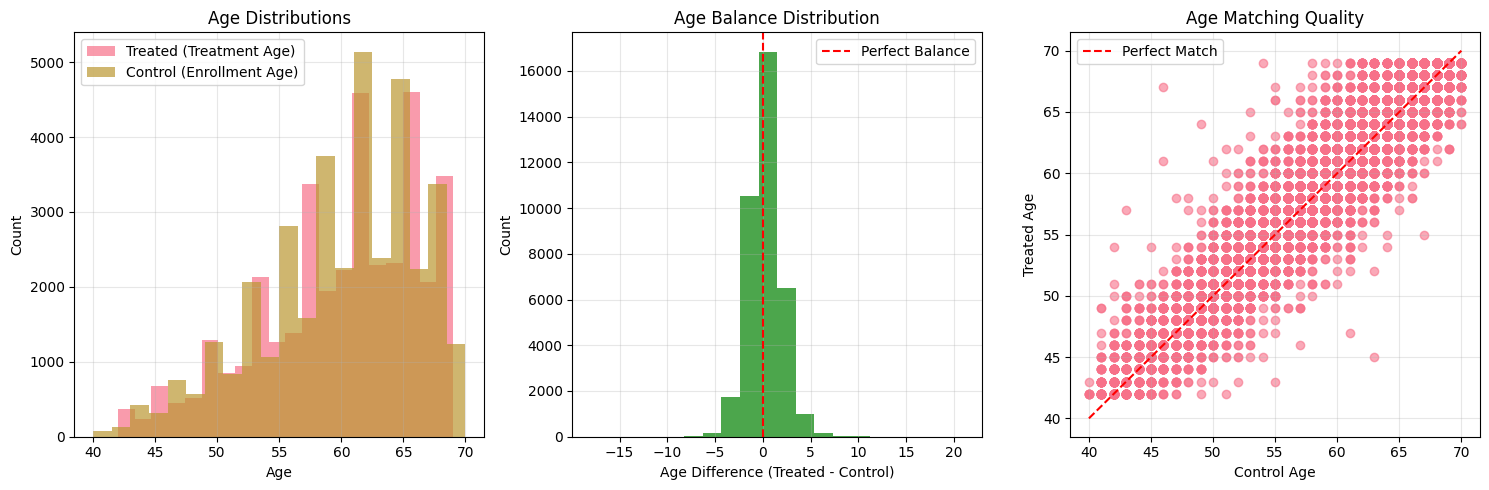


=== SUMMARY ===
Age matching quality: Good
Age balance achieved: Yes
Standard deviation of age differences: 1.8 years


In [56]:
## Analyze Age Distributions
statin_results=results_restrictive

# Extract age information from the results
print("=== AGE DISTRIBUTION ANALYSIS ===")

# Get the matched patient IDs
matched_treated_eids = statin_results['matched_patients']['treated_eids']
matched_control_eids = statin_results['matched_patients']['control_eids']

# Get the treatment times (these are distance from age 30)
treated_times = statin_results['treatment_times']['treated_times']
control_times = statin_results['treatment_times']['control_times']

print(f"Matched treated patients: {len(matched_treated_eids)}")
print(f"Matched control patients: {len(matched_control_eids)}")

# Convert time indices to actual ages
treated_actual_ages = [30 + t for t in treated_times]
control_actual_ages = [30 + t for t in control_times]

print(f"\n=== TREATED PATIENTS (Age at Treatment) ===")
print(f"Count: {len(treated_actual_ages)}")
print(f"Mean age: {np.mean(treated_actual_ages):.1f}")
print(f"Median age: {np.median(treated_actual_ages):.1f}")
print(f"Min age: {np.min(treated_actual_ages):.1f}")
print(f"Max age: {np.max(treated_actual_ages):.1f}")
print(f"Std dev: {np.std(treated_actual_ages):.1f}")

print(f"\n=== CONTROL PATIENTS (Age at Enrollment) ===")
print(f"Count: {len(control_actual_ages)}")
print(f"Mean age: {np.mean(control_actual_ages):.1f}")
print(f"Median age: {np.median(control_actual_ages):.1f}")
print(f"Min age: {np.min(control_actual_ages):.1f}")
print(f"Max age: {np.max(control_actual_ages):.1f}")
print(f"Std dev: {np.std(control_actual_ages):.1f}")

# Compare the distributions
age_diff = np.mean(treated_actual_ages) - np.mean(control_actual_ages)
print(f"\n=== AGE BALANCE ===")
print(f"Mean age difference (Treated - Control): {age_diff:.1f} years")
print(f"Age balance achieved: {'✅' if abs(age_diff) < 2 else '❌'} (within 2 years)")

# Get enrollment ages from covariate data for comparison
print(f"\n=== ENROLLMENT AGE COMPARISON ===")
treated_enroll_ages = []
control_enroll_ages = []

for eid in matched_treated_eids:
    enroll_age = covariate_dicts.get('age_at_enroll', {}).get(int(eid))
    if enroll_age is not None and not np.isnan(enroll_age):
        treated_enroll_ages.append(enroll_age)

for eid in matched_control_eids:
    enroll_age = covariate_dicts.get('age_at_enroll', {}).get(int(eid))
    if enroll_age is not None and not np.isnan(enroll_age):
        control_enroll_ages.append(enroll_age)

if treated_enroll_ages and control_enroll_ages:
    print(f"Treated enrollment age mean: {np.mean(treated_enroll_ages):.1f}")
    print(f"Control enrollment age mean: {np.mean(control_enroll_ages):.1f}")
    print(f"Enrollment age difference: {np.mean(treated_enroll_ages) - np.mean(control_enroll_ages):.1f} years")
    
    # Check if your "wrong" age calculation actually helped
    print(f"\n=== AGE CALCULATION ANALYSIS ===")
    print("Your current approach:")
    print(f"  Treated: Age at treatment = 30 + treatment_time")
    print(f"  Control: Age at enrollment = enrollment_age")
    
    # Show a few examples
    print(f"\nExample patients:")
    for i in range(min(5, len(matched_treated_eids))):
        treated_eid = matched_treated_eids[i]
        control_eid = matched_control_eids[i]
        
        treated_time = treated_times[i]
        control_time = control_times[i]
        
        treated_treatment_age = 30 + treated_time
        control_enrollment_age = 30 + control_time
        
        treated_enroll_age = covariate_dicts.get('age_at_enroll', {}).get(int(treated_eid), 'N/A')
        control_enroll_age = covariate_dicts.get('age_at_enroll', {}).get(int(control_eid), 'N/A')
        
        print(f"  Pair {i+1}:")
        print(f"    Treated EID {treated_eid}: treatment_age={treated_treatment_age:.1f}, enroll_age={treated_enroll_age}")
        print(f"    Control EID {control_eid}: control_age={control_enrollment_age:.1f}, enroll_age={control_enroll_age}")

# Create visualizations
plt.figure(figsize=(15, 5))

# Plot 1: Age distributions
plt.subplot(1, 3, 1)
plt.hist(treated_actual_ages, alpha=0.7, label='Treated (Treatment Age)', bins=20)
plt.hist(control_actual_ages, alpha=0.7, label='Control (Enrollment Age)', bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distributions')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Age balance
plt.subplot(1, 3, 2)
age_pairs = list(zip(treated_actual_ages, control_actual_ages))
age_diffs = [t - c for t, c in age_pairs]
plt.hist(age_diffs, bins=20, alpha=0.7, color='green')
plt.axvline(0, color='red', linestyle='--', label='Perfect Balance')
plt.xlabel('Age Difference (Treated - Control)')
plt.ylabel('Count')
plt.title('Age Balance Distribution')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Scatter plot of treated vs control ages
plt.subplot(1, 3, 3)
plt.scatter(control_actual_ages, treated_actual_ages, alpha=0.6)
plt.plot([min(control_actual_ages), max(control_actual_ages)], 
         [min(control_actual_ages), max(control_actual_ages)], 
         'r--', label='Perfect Match')
plt.xlabel('Control Age')
plt.ylabel('Treated Age')
plt.title('Age Matching Quality')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n=== SUMMARY ===")
print(f"Age matching quality: {'Good' if np.std(age_diffs) < 3 else 'Fair' if np.std(age_diffs) < 5 else 'Poor'}")
print(f"Age balance achieved: {'Yes' if abs(age_diff) < 2 else 'No'}")
print(f"Standard deviation of age differences: {np.std(age_diffs):.1f} years")



In [15]:
statin_results.keys()

dict_keys(['hazard_ratio_results', 'matched_patients', 'treatment_times', 'cohort_sizes', 'matching_features', 'balance_stats'])

In [9]:
# Check what ages you're actually matching on
print("Treated ages (with 'wrong' calculation):")
print(f"Min: {np.min(treated_features[:, 2])}")
print(f"Max: {np.max(treated_features[:, 2])}")
print(f"Mean: {np.mean(treated_features[:, 2])}")

print("\nControl ages:")
print(f"Min: {np.min(control_features[:, 2])}")
print(f"Max: {np.max(control_features[:, 2])}")
print(f"Mean: {np.mean(control_features[:, 2])}")

Treated ages (with 'wrong' calculation):
Min: 0.0017578016857204655
Max: 0.25470303598893806
Mean: 0.018716727449197806

Control ages:
Min: 0.0011365721033271452
Max: 0.234450420271436
Mean: 0.015284546102952289


In [80]:
statin_results['matched_patients']['treated_eids']

[1048581,
 1572874,
 2621461,
 5242901,
 1572899,
 5242929,
 3670068,
 5767220,
 5242965,
 4718688,
 3670133,
 2097274,
 5767300,
 5767314,
 1573033,
 4194477,
 5767358,
 3670208,
 5767377,
 2621651,
 5767391,
 2621670,
 4194543,
 4718869,
 2621724,
 4718927,
 5767506,
 4194668,
 2621821,
 5767553,
 5767607,
 4194744,
 1573308,
 5767613,
 3670465,
 4719065,
 2097644,
 5243387,
 2621948,
 4719120,
 1049112,
 2097688,
 2621984,
 1049130,
 5243474,
 2097754,
 2097763,
 3146340,
 3670644,
 3146363,
 2622117,
 3670718,
 1573576,
 4195031,
 1573604,
 4719351,
 1049341,
 2622222,
 1049362,
 3670825,
 5768005,
 2097994,
 5768016,
 4195157,
 2622302,
 4719509,
 2098085,
 4719540,
 5243833,
 5243866,
 1573857,
 1049588,
 2622475,
 1573909,
 2622492,
 2098206,
 5768222,
 4719649,
 4195379,
 4195381,
 4195394,
 5768258,
 2622534,
 1573963,
 4195406,
 5768285,
 5768291,
 4195428,
 2622569,
 4195453,
 3146885,
 4719761,
 2622628,
 4195495,
 4195500,
 4719790,
 5768418,
 4195558,
 3671304,
 4719895,


In [81]:
statin_results['matched_patients']['control_eids']

[5139347,
 5104676,
 2109255,
 4939500,
 5863997,
 4208215,
 5916079,
 5346480,
 4117867,
 4198262,
 3052221,
 5554337,
 1243161,
 2352032,
 1899141,
 4460408,
 1997671,
 4741425,
 4003747,
 3066899,
 2460049,
 5585723,
 3892377,
 5688713,
 5829251,
 4583502,
 4865344,
 2106243,
 2337398,
 4033490,
 1072679,
 4766025,
 4936408,
 1062720,
 2364752,
 1443113,
 2140640,
 5137774,
 5503890,
 4255837,
 5114067,
 3878486,
 3737180,
 1911435,
 4403131,
 1116052,
 4252080,
 4254661,
 2543809,
 5339035,
 1269442,
 2394427,
 1763968,
 4721165,
 5163872,
 4487938,
 1139174,
 3210328,
 1083995,
 3478187,
 4966608,
 3413206,
 3071730,
 1883398,
 4078879,
 2191968,
 4806421,
 2921693,
 2440881,
 5033155,
 5875886,
 3261269,
 5554405,
 3083314,
 1811230,
 1338209,
 5318226,
 3401672,
 1870081,
 3980768,
 5866461,
 3932174,
 4031793,
 4028014,
 1470477,
 3175654,
 5429079,
 4491466,
 5582407,
 4253298,
 2012559,
 3948070,
 4720301,
 3071572,
 2672752,
 2103165,
 2471358,
 2690262,
 3257036,
 4439769,


In [82]:
statin_results['treatment_times']['control_times']

[32,
 32,
 30,
 31,
 36,
 21,
 32,
 32,
 31,
 35,
 32,
 28,
 36,
 38,
 28,
 31,
 33,
 28,
 24,
 35,
 33,
 30,
 28,
 35,
 25,
 29,
 34,
 26,
 30,
 36,
 38,
 33,
 26,
 21,
 26,
 25,
 25,
 29,
 27,
 31,
 35,
 28,
 34,
 36,
 30,
 36,
 37,
 23,
 38,
 20,
 32,
 35,
 32,
 30,
 32,
 35,
 35,
 30,
 28,
 30,
 15,
 20,
 27,
 36,
 34,
 30,
 36,
 36,
 27,
 32,
 37,
 32,
 33,
 35,
 23,
 30,
 31,
 33,
 25,
 32,
 31,
 31,
 28,
 24,
 20,
 29,
 35,
 36,
 25,
 31,
 36,
 39,
 22,
 33,
 18,
 31,
 24,
 39,
 36,
 35,
 33,
 29,
 31,
 23,
 19,
 34,
 32,
 36,
 38,
 29,
 33,
 36,
 22,
 33,
 31,
 34,
 33,
 18,
 29,
 35,
 32,
 37,
 29,
 19,
 36,
 31,
 29,
 26,
 25,
 32,
 32,
 29,
 20,
 33,
 30,
 23,
 37,
 17,
 25,
 34,
 36,
 37,
 35,
 26,
 38,
 35,
 34,
 34,
 31,
 39,
 26,
 37,
 31,
 30,
 21,
 35,
 25,
 37,
 34,
 34,
 23,
 36,
 34,
 32,
 35,
 17,
 25,
 35,
 22,
 23,
 33,
 32,
 37,
 33,
 22,
 15,
 32,
 30,
 37,
 26,
 38,
 35,
 33,
 35,
 25,
 31,
 26,
 37,
 29,
 23,
 36,
 29,
 22,
 22,
 31,
 27,
 33,
 33,
 30,
 31,


In [83]:
# Check the actual index times used for matching
print("=== ACTUAL INDEX TIMES USED FOR MATCHING ===")

# Get the treatment times (these are distance from age 30)
treated_times = statin_results['treatment_times']['treated_times']
control_times = statin_results['treatment_times']['control_times']

print(f"Treated times (distance from age 30):")
print(f"  Count: {len(treated_times)}")
print(f"  Mean: {np.mean(treated_times):.2f}")
print(f"  Median: {np.median(treated_times):.2f}")
print(f"  Range: {np.min(treated_times):.1f} to {np.max(treated_times):.1f}")

print(f"\nControl times (distance from age 30):")
print(f"  Count: {len(control_times)}")
print(f"  Mean: {np.mean(control_times):.2f}")
print(f"  Median: {np.median(control_times):.2f}")
print(f"  Range: {np.min(control_times):.1f} to {np.max(control_times):.1f}")

# Convert to actual ages
print(f"\n=== CONVERTED TO ACTUAL AGES ===")
treated_actual_ages = [30 + t for t in treated_times]
control_actual_ages = [30 + t for t in control_times]

print(f"Treated actual ages:")
print(f"  Mean: {np.mean(treated_actual_ages):.2f}")
print(f"  Median: {np.median(treated_actual_ages):.2f}")
print(f"  Range: {np.min(treated_actual_ages):.1f} to {np.max(treated_actual_ages):.1f}")

print(f"\nControl actual ages:")
print(f"  Mean: {np.mean(control_actual_ages):.2f}")
print(f"  Median: {np.median(control_actual_ages):.2f}")
print(f"  Range: {np.min(control_actual_ages):.1f} to {np.max(control_actual_ages):.1f}")

# Check if these match what we'd expect from the covariate data
print(f"\n=== VALIDATION AGAINST COVARIATES ===")
# Sample a few patients to check
sample_size = min(5, len(treated_times))
for i in range(sample_size):
    treated_eid = statin_results['matched_patients']['treated_eids'][i]
    control_eid = statin_results['matched_patients']['control_eids'][i]
    
    treated_time = treated_times[i]
    control_time = control_times[i]
    
    # Get enrollment ages from covariates
    treated_enroll_age = covariate_dicts['age_at_enroll'].get(int(treated_eid))
    control_enroll_age = covariate_dicts['age_at_enroll'].get(int(control_eid))
    
    print(f"Pair {i+1}:")
    print(f"  Treated EID {treated_eid}: time_index={treated_time}, actual_age={30+treated_time:.1f}, enroll_age={treated_enroll_age:.1f}")
    print(f"  Control EID {control_eid}: time_index={control_time}, actual_age={30+control_time:.1f}, enroll_age={control_enroll_age:.1f}")

=== ACTUAL INDEX TIMES USED FOR MATCHING ===
Treated times (distance from age 30):
  Count: 37313
  Mean: 29.88
  Median: 31.00
  Range: 12.0 to 39.0

Control times (distance from age 30):
  Count: 37313
  Mean: 29.87
  Median: 31.00
  Range: 10.0 to 40.0

=== CONVERTED TO ACTUAL AGES ===
Treated actual ages:
  Mean: 59.88
  Median: 61.00
  Range: 42.0 to 69.0

Control actual ages:
  Mean: 59.87
  Median: 61.00
  Range: 40.0 to 70.0

=== VALIDATION AGAINST COVARIATES ===
Pair 1:
  Treated EID 1048581: time_index=32, actual_age=62.0, enroll_age=60.1
  Control EID 5139347: time_index=32, actual_age=62.0, enroll_age=62.3
Pair 2:
  Treated EID 1572874: time_index=34, actual_age=64.0, enroll_age=67.5
  Control EID 5104676: time_index=32, actual_age=62.0, enroll_age=62.3
Pair 3:
  Treated EID 2621461: time_index=29, actual_age=59.0, enroll_age=63.1
  Control EID 2109255: time_index=30, actual_age=60.0, enroll_age=60.2
Pair 4:
  Treated EID 5242901: time_index=29, actual_age=59.0, enroll_age=

In [24]:
# Get follow-up times for events only
treated_event_times = [time for i, time in enumerate(statin_results['follow_up_times'][:37145]) 
                      if statin_results['treated_outcomes'][i] == 1]

control_event_times = [time for i, time in enumerate(statin_results['follow_up_times'][37145:]) 
                      if statin_results['control_outcomes'][i] == 1]

print("=== EVENT TIMING SUMMARY ===")
print(f"Treated events (n={len(treated_event_times)}):")
print(f"  Min: {np.min(treated_event_times):.1f} years")
print(f"  Max: {np.max(treated_event_times):.1f} years") 
print(f"  Mean: {np.mean(treated_event_times):.2f} years")
print(f"  Median: {np.median(treated_event_times):.2f} years")
print(f"  Q1: {np.percentile(treated_event_times, 25):.2f} years")
print(f"  Q3: {np.percentile(treated_event_times, 75):.2f} years")

print(f"\nControl events (n={len(control_event_times)}):")
print(f"  Min: {np.min(control_event_times):.1f} years")
print(f"  Max: {np.max(control_event_times):.1f} years")
print(f"  Mean: {np.mean(control_event_times):.2f} years") 
print(f"  Median: {np.median(control_event_times):.2f} years")
print(f"  Q1: {np.percentile(control_event_times, 25):.2f} years")
print(f"  Q3: {np.percentile(control_event_times, 75):.2f} years")

=== EVENT TIMING SUMMARY ===
Treated events (n=321):
  Min: 0.0 years
  Max: 4.0 years
  Mean: 1.49 years
  Median: 1.00 years
  Q1: 0.00 years
  Q3: 3.00 years

Control events (n=247):
  Min: 0.0 years
  Max: 4.0 years
  Mean: 2.56 years
  Median: 3.00 years
  Q1: 2.00 years
  Q3: 4.00 years


In [ ]:
print("Available keys in statin_results:")
print(list(statin_results.keys()))
print(f"follow_up_times length: {len(statin_results['follow_up_times'])}")
print(f"treated_outcomes length: {len(statin_results['treated_outcomes'])}")

# Check if control_outcomes exists
if 'control_outcomes' in statin_results:
    print(f"control_outcomes length: {len(statin_results['control_outcomes'])}")
else:
    print("control_outcomes key not found")
    
# Check the structure - are outcomes combined in one list?
print(f"Total outcomes: {len(statin_results['treated_outcomes']) + len(statin_results.get('control_outcomes', []))}")

Available keys in statin_results:
['hazard_ratio_results', 'matched_patients', 'treatment_times', 'cohort_sizes', 'matching_features', 'balance_stats', 'follow_up_times', 'treated_outcomes', 'control_outcomes']
follow_up_times length: 74290
treated_outcomes length: 37145
control_outcomes length: 37145
Total outcomes: 74290


In [8]:
del simple_treatment_analysis

In [9]:
import torch as torch
from scripts.dt import *
import pandas as pd
# this will make the covariate dictionaries
from scripts.make_covariate_dicts import *
# Import and run the simple treatment analysis with your variables
from old_simple_treat import *



print(f"Y shape: {Y.shape}")
print(f"processed_ids length: {len(processed_ids)}")
print(f"First few processed_ids: {processed_ids[:5]}")

#from comprehensive_treatment_analysis import *
sig_indices=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
# Now run the analysis with outcomes
# Run the simplified treatment analysis
statin_results = simple_treatment_analysis(
    gp_scripts=gp_scripts,
    true_statins=true_statins, 
    processed_ids=processed_ids,
    thetas=thetas,
    sig_indices=sig_indices,
    covariate_dicts=covariate_dicts,
    Y=Y,
    event_indices=[112, 113, 114, 115, 116],  # ASCVD composite events
    cov=cov
)

2025-08-24 16:21:32.376 No runtime found, using MemoryCacheStorageManager
2025-08-24 16:21:32.380 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-24 16:21:32.380 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-24 16:21:32.380 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-24 16:21:32.380 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-24 16:21:32.381 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Y shape: torch.Size([407878, 348, 52])
processed_ids length: 400000
First few processed_ids: [1000015 1000023 1000037 1000042 1000059]
=== SIMPLIFIED TREATMENT ANALYSIS ===
1. Extracting patient cohorts...
   Setting up OTPL...
Found 53514 treated patients
Found 116131 never-treated patients
   Getting treatment patterns from OTPL...
   Extracted 53514 treated patients and 116131 control patients
   Treated treatment times range: 12 to 39
   Calculating control timing...
   Control patients with valid timing: 116129
   Control t0s range: 10 to 41
   Created EID-to-t0 mapping for 116129 controls
2. Building features with exclusions...
   Building treated features for 53514 patients...
Processing 53514 patients with sig_indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Processed 0 patients, kept 0 so far
Processed 1000 patients, kept 836 so far
Processed 2000 patients, kept 1671 so far
Processed 3000 patients, kept 2506 so far
Processed 4000 patients, kep

: 

In [8]:
from scripts.observational_treatment_patterns import ObservationalTreatmentPatternLearner

# Check if we have the required data for OTPL
if 'cov' in locals() and cov is not None:
    otpl = ObservationalTreatmentPatternLearner(
        signature_loadings=thetas,
        processed_ids=processed_ids,
        statin_prescriptions=true_statins,
        covariates=cov,
        gp_scripts=gp_scripts
    )

    
    # Get the treatment patterns from the OTPL
    patterns = otpl.treatment_patterns
    treated_eids = patterns['treated_patients']
    treated_treatment_times = patterns['treatment_times']
    control_eids = patterns['never_treated']
    
    # For treated patients, t0 is treatment time
    treated_t0s = treated_treatment_times.copy()
  
            


# Now calculate control timing once for both paths
control_t0s = []
valid_control_eids = []

for eid in control_eids:
    try:
        age_at_enroll = covariate_dicts['age_at_enroll'].get(int(eid))
        if age_at_enroll is not None and not np.isnan(age_at_enroll):
            t0 = int(age_at_enroll - 30)
            if t0 >= 10:
                control_t0s.append(t0)
                valid_control_eids.append(eid)
    except:
        continue

control_eids = valid_control_eids

event_indices=[112, 113, 114, 115, 116]
print("2. Building features with exclusions...")
treated_features, treated_indices, kept_treated_eids = build_features(
    treated_eids, treated_t0s, processed_ids, thetas, covariate_dicts, 
    sig_indices, is_treated=True, treatment_dates=treated_treatment_times,
    Y=Y, event_indices=event_indices
)

control_features, control_indices, kept_control_eids = build_features(
    control_eids, control_t0s, processed_ids, thetas, covariate_dicts, 
    sig_indices, is_treated=False, Y=Y, event_indices=event_indices
)



print(f"   Treated patients after exclusions: {len(treated_features):,}")

print(f"   Control patients after exclusions: {len(control_features):,}")

if len(treated_features) == 0 or len(control_features) == 0:
    print("Error: No patients left after exclusions")

 

# VERIFICATION: Check for statin contamination in control group
print("3. Verifying control group purity...")
control_statin_check = 0
for eid in kept_control_eids:
    if eid in true_statins:
        control_statin_check += 1
        print(f"   WARNING: Control patient {eid} has statin prescription!")

if control_statin_check > 0:
    print(f"   ⚠️ Found {control_statin_check} controls with statin prescriptions - contamination!")
else:
    print("   ✅ No statin contamination in control group")


    # VERIFICATION: Check covariate balance before matching
    print("4. Assessing covariate balance before matching...")
    if len(treated_features) > 0 and len(control_features) > 0:
        # Calculate means for key covariates
        treated_age_mean = np.mean(treated_features[:, -2])  # Age is second to last
        treated_sex_mean = np.mean(treated_features[:, -1])  # Sex is last
        control_age_mean = np.mean(control_features[:, -2])
        control_sex_mean = np.mean(control_features[:, -1])
        
        print(f"   BEFORE MATCHING:")
        print(f"   Treated: Age={treated_age_mean:.1f}, Sex(Male)={treated_sex_mean*100:.1f}%")
        print(f"   Control: Age={control_age_mean:.1f}, Sex(Male)={control_sex_mean*100:.1f}%")
        print(f"   Age difference: {abs(treated_age_mean - control_age_mean):.1f} years")
        print(f"   Sex difference: {abs(treated_sex_mean - control_sex_mean)*100:.1f}%")
    
    # Perfor


print("5. Performing matching...")

matched_treated_indices, matched_control_indices, matched_treated_eids, matched_control_eids = perform_greedy_1to1_matching_fast(
    treated_features, control_features, treated_indices, control_indices,
    kept_treated_eids, kept_control_eids
)
   

matched_pairs = list(zip(range(len(matched_treated_indices)), range(len(matched_control_indices))))

Found 53514 treated patients
Found 116131 never-treated patients
2. Building features with exclusions...
Processing 53514 patients with sig_indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Processed 0 patients, kept 0 so far
Processed 1000 patients, kept 836 so far
Processed 2000 patients, kept 1671 so far
Processed 3000 patients, kept 2506 so far
Processed 4000 patients, kept 3337 so far
Processed 5000 patients, kept 4194 so far
Processed 6000 patients, kept 5023 so far
Processed 7000 patients, kept 5851 so far
Processed 8000 patients, kept 6691 so far
Processed 9000 patients, kept 7536 so far
Processed 10000 patients, kept 8369 so far
Processed 11000 patients, kept 9205 so far
Processed 12000 patients, kept 10058 so far
Processed 13000 patients, kept 10900 so far
Processed 14000 patients, kept 11732 so far
Processed 15000 patients, kept 12567 so far
Processed 16000 patients, kept 13390 so far
Processed 17000 patients, kept 14214 so far
Processed 1800

In [25]:
treated_patients_eids=statin_results['matched_patients']['treated_eids']


In [26]:

for i, (eid, t0) in enumerate(treated_patients_eids[:5]):
    print(f"\nPatient {i+1}: EID {eid}")
    
    # Get their enrollment age
    enroll_age = covariate_dicts['age_at_enroll'].get(int(eid))
    print(f"  Enrollment age: {enroll_age}")
    print(f"  T0 (enrollment time index): {t0}")
    print(f"  Actual enrollment time: {30 + t0} years old")
    
    # Check events before enrollment
    y_idx = np.where(processed_ids == int(eid))[0][0]
    pre_events = Y[y_idx, event_indices, :t0]
    if hasattr(pre_events, 'detach'):
        pre_events = pre_events.detach().cpu().numpy()
    
    # Find which events occurred and when
    event_times = np.where(pre_events > 0)[0]
    if len(event_times) > 0:
        print(f"  ❌ EVENTS FOUND before enrollment:")
        for event_time in event_times:
            event_age = 30 + event_time
            print(f"    Event at time index {event_time} (age {event_age})")
    else:
        print(f"  ✅ NO events found before enrollment (this is a bug!)")
    
    # Also check what the build_features function would have seen
    print(f"  What build_features saw: t0={t0}, events before t0: {np.any(pre_events > 0)}")

TypeError: cannot unpack non-iterable numpy.int64 object

In [20]:

# Check the first 5 problematic patients
print(f"Found {len(problem_control_eids)} control patients with pre-enrollment events")
print("Checking first 5...")

for i, (eid, t0) in enumerate(problem_control_eids[:5]):
    print(f"\nPatient {i+1}: EID {eid}")
    
    # Get their enrollment age
    enroll_age = covariate_dicts['age_at_enroll'].get(int(eid))
    print(f"  Enrollment age: {enroll_age}")
    print(f"  T0 (enrollment time index): {t0}")
    print(f"  Actual enrollment time: {30 + t0} years old")
    
    # Check events before enrollment
    y_idx = np.where(processed_ids == int(eid))[0][0]
    pre_events = Y[y_idx, event_indices, :t0]
    if hasattr(pre_events, 'detach'):
        pre_events = pre_events.detach().cpu().numpy()
    
    # Find which events occurred and when
    event_times = np.where(pre_events > 0)[0]
    if len(event_times) > 0:
        print(f"  ❌ EVENTS FOUND before enrollment:")
        for event_time in event_times:
            event_age = 30 + event_time
            print(f"    Event at time index {event_time} (age {event_age})")
    else:
        print(f"  ✅ NO events found before enrollment (this is a bug!)")
    
    # Also check what the build_features function would have seen
    print(f"  What build_features saw: t0={t0}, events before t0: {np.any(pre_events > 0)}")

NameError: name 'problem_control_eids' is not defined

In [38]:
control_t0 = control_t0s[kept_control_eids.index(control_eid)]

In [39]:
control_t0

39

In [46]:
print("=== CHECKING FIRST 10 MATCHED CONTROL PATIENTS ===")

for i in range(min(10, len(matched_control_eids))):
    control_eid = matched_control_eids[i]
    
    # Get their enrollment age from covariate_dicts
    enroll_age = covariate_dicts['age_at_enroll'].get(int(control_eid))
    
    # Get their t0 from the control_t0s list
    control_idx = kept_control_eids.index(control_eid)
    t0 = control_t0s[control_idx]
    
    # Calculate what t0 should be
    expected_t0 = int(enroll_age - 30) if enroll_age is not None else None
    
    print(f"Patient {i+1}: EID {control_eid}")
    print(f"  Enrollment age: {enroll_age}")
    print(f"  T0 from list: {t0}")
    print(f"  Expected T0: {expected_t0}")
    print(f"  T0 matches expected: {t0 == expected_t0}")
    print(f"  Time index difference: {t0 - expected_t0 if expected_t0 is not None else 'N/A'}")
    print("---")


=== CHECKING FIRST 10 MATCHED CONTROL PATIENTS ===
Patient 1: EID 5139347
  Enrollment age: 62.3155251141553
  T0 from list: 32
  Expected T0: 32
  T0 matches expected: True
  Time index difference: 0
---
Patient 2: EID 5104676
  Enrollment age: 62.2908675799087
  T0 from list: 16
  Expected T0: 32
  T0 matches expected: False
  Time index difference: -16
---
Patient 3: EID 2109255
  Enrollment age: 60.2197488584475
  T0 from list: 12
  Expected T0: 30
  T0 matches expected: False
  Time index difference: -18
---
Patient 4: EID 3458995
  Enrollment age: 59.2307077625571
  T0 from list: 25
  Expected T0: 29
  T0 matches expected: False
  Time index difference: -4
---
Patient 5: EID 5863997
  Enrollment age: 66.5538812785388
  T0 from list: 27
  Expected T0: 36
  T0 matches expected: False
  Time index difference: -9
---
Patient 6: EID 3968674
  Enrollment age: 53.4990867579909
  T0 from list: 18
  Expected T0: 23
  T0 matches expected: False
  Time index difference: -5
---
Patient 7: EI

In [48]:
matched_control_eids[1]

5104676

In [ ]:

# Check the first 5 problematic patients
print(f"Found {len(problem_control_eids)} control patients with pre-enrollment events")
print("Checking first 5...")

for i, (eid, t0) in enumerate(problem_control_eids[:5]):
    print(f"\nPatient {i+1}: EID {eid}")
    
    # Get their enrollment age
    enroll_age = covariate_dicts['age_at_enroll'].get(int(eid))
    print(f"  Enrollment age: {enroll_age}")
    print(f"  T0 (enrollment time index): {t0}")
    print(f"  Actual enrollment time: {30 + t0} years old")
    
    # Check events before enrollment
    y_idx = np.where(processed_ids == int(eid))[0][0]
    pre_events = Y[y_idx, event_indices, :t0]
    if hasattr(pre_events, 'detach'):
        pre_events = pre_events.detach().cpu().numpy()
    
    # Find which events occurred and when
    event_times = np.where(pre_events > 0)[0]
    if len(event_times) > 0:
        print(f"  ❌ EVENTS FOUND before enrollment:")
        for event_time in event_times:
            event_age = 30 + event_time
            print(f"    Event at time index {event_time} (age {event_age})")
    else:
        print(f"  ✅ NO events found before enrollment (this is a bug!)")
    
    # Also check what the build_features function would have seen
    print(f"  What build_features saw: t0={t0}, events before t0: {np.any(pre_events > 0)}")

In [27]:
# Check unique counts in statin_results
print("=== PYTHON RESULTS VERIFICATION ===")


# Check if there are any duplicates
treated_duplicates = len(matched_treated_eids) - len(set(matched_treated_eids))
control_duplicates = len(matched_control_eids) - len(set(matched_control_eids))

print(f"Duplicate treated EIDs: {treated_duplicates}")
print(f"Duplicate control EIDs: {control_duplicates}")

=== PYTHON RESULTS VERIFICATION ===
Duplicate treated EIDs: 0
Duplicate control EIDs: 0


In [23]:
# See what's actually imported and available
print("Available functions:")
print([name for name in dir() if not name.startswith('_')])

# Check if the functions exist
print("\nChecking for key functions:")
for func_name in ['build_features', 'perform_matching', 'calculate_hazard_ratio']:
    if func_name in dir():
        print(f"✅ {func_name} is available")
        # Show where it came from
        func = eval(func_name)
        print(f"   Source: {func.__module__}")
    else:
        print(f"❌ {func_name} is NOT available")



Available functions:
['CoxPHFitter', 'G', 'In', 'NearestNeighbors', 'ObservationalTreatmentPatternLearner', 'Out', 'StandardScaler', 'Y', 'age_at_enroll', 'assess_matching_balance', 'basic_analysis', 'build_features', 'build_features_no_sigs', 'cad_idx', 'calculate_hazard_ratio', 'check_comprehensive_controls_contamination', 'cov', 'covariate_dicts', 'disease_names', 'disease_names_df', 'eid_to_age', 'eid_to_antihtnbase', 'eid_to_cad_any', 'eid_to_cad_censor_age', 'eid_to_cad_prs', 'eid_to_dm1_prev', 'eid_to_dm2_prev', 'eid_to_dm_any', 'eid_to_dm_censor_age', 'eid_to_hdl', 'eid_to_hl_prev', 'eid_to_ht_any', 'eid_to_ht_censor_age', 'eid_to_htn', 'eid_to_hyperlip_any', 'eid_to_hyperlip_censor_age', 'eid_to_ldl_prs', 'eid_to_pce_goff', 'eid_to_race', 'eid_to_sbp', 'eid_to_sex', 'eid_to_smoke', 'eid_to_tchol', 'eid_to_yob', 'encode_smoking', 'exit', 'find_statins_basic', 'get_ipython', 'get_time_index', 'gp_scripts', 'inspect', 'key', 'ldl_idx', 'learner', 'mean_thetas', 'never_treated_eid

In [84]:
# Get the cached function code
print(inspect.getsource(build_features))

def build_features(eids, t0s, processed_ids, thetas, covariate_dicts, sig_indices=None, 
                  is_treated=False, treatment_dates=None):
    """
    Build feature vectors for matching with proper exclusions and imputation
    
    Parameters:
    - eids: List of patient IDs
    - t0s: List of time indices for each patient
    - processed_ids: Array of all processed patient IDs
    - thetas: Signature loadings (N x K x T)
    - covariate_dicts: Dictionary with covariate data
    - sig_indices: Optional list of signature indices to use
    - is_treated: Whether these are treated patients
    - treatment_dates: Treatment dates for treated patients
    
    Returns:
    - features: Feature matrix for matching
    - indices: Patient indices in thetas
    - kept_eids: Successfully matched patient IDs
    """
    features = []
    indices = []
    kept_eids = []
    window = 10  # 10 years of signature history
    n_signatures = thetas.shape[1]
    if sig_indices is None:
        s

[autoreload of old_simple_treat failed: Traceback (most recent call last):
  File "/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
  File "/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 846, in exec_module
  File "<frozen importlib._bootstrap_external>", line 983, in get_code
  File "<frozen importlib._bootstrap_external>", line 913, in source_to_code
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/Users/sarahurbut/dtwin_noulli/old_simple_treat.py", line 526
    control_t0s = []
    ^
Syn

In [230]:
# Visual inspection of Y array using statin_results
print("=== VISUAL INSPECTION OF Y ARRAY ===")

# Get sample patients from the results
sample_size = 50
sample_treated_eids = statin_results['matched_patients']['treated_eids'][:sample_size]
sample_control_eids = statin_results['matched_patients']['control_eids'][:sample_size]


=== VISUAL INSPECTION OF Y ARRAY ===


In [184]:

print(f"\nInspecting {sample_size} treated patients:")
for i, eid in enumerate(sample_treated_eids):
    # Find global index
    global_idx = np.where(processed_ids == eid)[0][0]
    
    # Get treatment time
    treatment_idx = statin_results['matched_patients']['treated_indices'][i]
    treatment_time = statin_results['treatment_times']['treated_times'][i]
    
    # Get Y data for this patient
    y_patient = Y[global_idx, event_indices, :]
    
    print(f"\nTreated Patient {i+1}: EID={eid}")
    print(f"  Global index: {global_idx}")
    print(f"  Treatment time: {treatment_time} (age {30 + treatment_time})")
    print(f"  Y data shape: {y_patient.shape}")
    print(f"  Events: {y_patient}")
    
    # Check events after treatment
    post_treatment = y_patient[int(treatment_time):]
    print(f"  Post-treatment events: {post_treatment}")
    
    # Check if this matches our calculated outcome
    if hasattr(statin_results, 'treated_outcomes'):
        calc_outcome = statin_results['treated_outcomes'][i]
        calc_followup = statin_results['follow_up_times'][i]
        print(f"  Calculated: event={calc_outcome}, followup={calc_followup}")

print(f"\nInspecting {sample_size} control patients:")
for i, eid in enumerate(sample_control_eids):
    # Find global index
    global_idx = np.where(processed_ids == eid)[0][0]
    
    # Get control time (enrollment age)
    control_idx = statin_results['matched_patients']['control_indices'][i]
    control_time = statin_results['treatment_times']['control_times'][i]
    
    
    # Get Y data for this patient
    y_patient = Y[global_idx, event_indices, :]
    
    print(f"\nControl Patient {i+1}: EID={eid}")
    print(f"  Global index: {global_idx}")
    print(f"  Control time: {control_time} (age {30 + control_time})")
    print(f"  Y data shape: {y_patient.shape}")
    print(f"  Events: {y_patient}")
    
    # Check events after enrollment
    post_enrollment = y_patient[int(control_time):]
    print(f"  Post-enrollment events: {post_enrollment}")
    
    # Check if this matches our calculated outcome
    if hasattr(statin_results, 'control_outcomes'):
        calc_outcome = statin_results['control_outcomes'][i]
        calc_followup = statin_results['follow_up_times'][len(sample_treated_eids) + i]
        print(f"  Calculated: event={calc_outcome}, followup={calc_followup}")


Inspecting 50 treated patients:

Treated Patient 1: EID=1048581
  Global index: 3944
  Treatment time: 32 (age 62)
  Y data shape: torch.Size([5, 52])
  Events: tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 

In [9]:
event_indices = [112,113,114,115,116]

In [10]:
# Find patients with events
print("=== FINDING PATIENTS WITH EVENTS ===")

# Check treated patients with events
treated_with_events = []
for i, eid in enumerate(statin_results['matched_patients']['treated_eids']):
    if statin_results['treated_outcomes'][i] == 1:  # Event occurred
        treated_with_events.append((i, eid))

# Check control patients with events  
control_with_events = []
for i, eid in enumerate(statin_results['matched_patients']['control_eids']):
    if statin_results['control_outcomes'][i] == 1:  # Event occurred
        control_with_events.append((i, eid))

print(f"Treated patients with events: {len(treated_with_events)}")
print(f"Control patients with events: {len(control_with_events)}")

# Show first few treated patients with events
if treated_with_events:
    print(f"\nFirst 3 treated patients with events:")
    for i, (idx, eid) in enumerate(treated_with_events[:3]):
        print(f"  {i+1}. Index {idx}, EID {eid}")
        
        # Get their data
        treatment_time = statin_results['treatment_times']['treated_times'][idx]
        followup_time = statin_results['follow_up_times'][idx]
        
        print(f"     Treatment time: {treatment_time} (age {30 + treatment_time})")
        print(f"     Follow-up time: {followup_time}")
        
        # Find global index to inspect Y array
        global_idx = np.where(processed_ids == eid)[0][0]
        y_patient = Y[global_idx, event_indices, :]
        
        
        print(f"     Y data: {y_patient}")
        print(f"     Post-treatment events: {y_patient[:,(treatment_time+followup_time)]}")

# Show first few control patients with events
if control_with_events:
    print(f"\nFirst 3 control patients with events:")
    for i, (idx, eid) in enumerate(control_with_events[:3]):
        print(f"  {i+1}. Index {idx}, EID {eid}")
        
        # Get their data (assuming control_times exists)
        if 'control_times' in statin_results:
            control_time = statin_results['control_times'][idx]
            print(f"     Control time: {control_time} (age {30 + control_time})")
        
        followup_time = statin_results['follow_up_times'][len(statin_results['matched_patients']['treated_eids']) + idx]
        print(f"     Follow-up time: {followup_time}")
        
        # Find global index to inspect Y array
        global_idx = np.where(processed_ids == eid)[0][0]
        y_patient = Y[global_idx, event_indices, :]
        
        print(f"     Y data: {y_patient}")
        if 'control_times' in statin_results:
            print(f"     Post-enrollment events: {y_patient[:,(treatment_time+followup_time)]}")

=== FINDING PATIENTS WITH EVENTS ===
Treated patients with events: 321
Control patients with events: 257

First 3 treated patients with events:
  1. Index 20, EID 5767391
     Treatment time: 33 (age 63)
     Follow-up time: 3
     Y data: tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [204]:
follow_up_time=3

In [212]:
disease_names[112:116]

['Myocardial infarction',
 'Angina pectoris',
 'Coronary atherosclerosis',
 'Other chronic ischemic heart disease, unspecified']

In [206]:
y_patient[:,(treatment_time+follow_up_time)]

tensor([0., 1., 0., 0., 0.])

In [161]:
# Check how many patients have events at follow_up_time = 1
follow_up_times = statin_results['follow_up_times']
treated_outcomes = statin_results['treated_outcomes']
control_outcomes = statin_results['control_outcomes']

# Count events at follow_up_time = 1
treated_events_at_1 = sum(1 for i, t in enumerate(follow_up_times[:len(treated_outcomes)]) 
                         if t == 1 and treated_outcomes[i] == 1)
control_events_at_1 = sum(1 for i, t in enumerate(follow_up_times[len(treated_outcomes):]) 
                         if t == 1 and control_outcomes[i] == 1)

print(f"Treated events at follow_up_time=1: {treated_events_at_1}")
print(f"Control events at follow_up_time=1: {control_events_at_1}")
print(f"Total events at follow_up_time=1: {treated_events_at_1 + control_events_at_1}")

Treated events at follow_up_time=1: 0
Control events at follow_up_time=1: 0
Total events at follow_up_time=1: 0


In [236]:
len(statin_results['matched_patients']['treated_eids'])

37313

In [13]:
# Check unique counts in statin_results
print("=== PYTHON RESULTS VERIFICATION ===")
print(f"Treated EIDs: {len(set(statin_results['matched_patients']['treated_eids']))}")
print(f"Control EIDs: {len(set(statin_results['matched_patients']['control_eids']))}")
print(f"Total matched pairs: {len(statin_results['matched_patients']['treated_eids'])}")

# Check if there are any duplicates
treated_duplicates = len(statin_results['matched_patients']['treated_eids']) - len(set(statin_results['matched_patients']['treated_eids']))
control_duplicates = len(statin_results['matched_patients']['control_eids']) - len(set(statin_results['matched_patients']['control_eids']))

print(f"Duplicate treated EIDs: {treated_duplicates}")
print(f"Duplicate control EIDs: {control_duplicates}")

=== PYTHON RESULTS VERIFICATION ===
Treated EIDs: 37313
Control EIDs: 37313
Total matched pairs: 37313
Duplicate treated EIDs: 0
Duplicate control EIDs: 0


In [11]:
print("=== COUNTING PATIENTS WITH PRE-TREATMENT EVENTS ===")

# Get the current matched treated patients
matched_treated_indices = statin_results['matched_patients']['treated_indices']
matched_treated_eids = statin_results['matched_patients']['treated_eids']

print(f"Total matched treated patients: {len(matched_treated_indices)}")

# Count patients with pre-treatment events
pre_treatment_event_count = 0
pre_treatment_event_patients = []

for i, (treated_idx, treated_eid) in enumerate(zip(matched_treated_indices, matched_treated_eids)):
    # Find treatment time for this patient
    treatment_time = None
    for j, eid in enumerate(statin_results['matched_patients']['treated_eids']):
        if eid == treated_eid:
            treatment_time = statin_results['treatment_times']['treated_times'][j]
            break
    
    if treatment_time is not None:
        # Find this patient in the global Y tensor using processed_ids
        global_idx = np.where(processed_ids == treated_eid)[0][0]
        
        # Check for events before treatment
        patient_y = Y[global_idx, 112:117, :].detach().cpu().numpy()  # ASCVD events
        
        # Check events before treatment time
        pre_treatment_events = patient_y[:, :int(treatment_time)]
        if np.any(pre_treatment_events > 0):
            pre_treatment_event_count += 1
            pre_treatment_event_patients.append({
                'index': i,
                'eid': treated_eid,
                'global_y_index': global_idx,
                'treatment_time': treatment_time,
                'pre_treatment_events': np.where(pre_treatment_events > 0)[1].tolist()
            })

print(f"\nPatients with pre-treatment events: {pre_treatment_event_count}")
print(f"Percentage: {pre_treatment_event_count/len(matched_treated_indices)*100:.1f}%")

if pre_treatment_event_count > 0:
    print(f"\nSample patients with pre-treatment events:")
    for i, patient in enumerate(pre_treatment_event_patients[:5]):
        print(f"  Patient {patient['index']}: EID {patient['eid']}, "
              f"Global Y index {patient['global_y_index']}, "
              f"Treatment time {patient['treatment_time']}, "
              f"Events at times {patient['pre_treatment_events']}")
    
    if len(pre_treatment_event_patients) > 5:
        print(f"  ... and {len(pre_treatment_event_patients) - 5} more")

=== COUNTING PATIENTS WITH PRE-TREATMENT EVENTS ===
Total matched treated patients: 37313

Patients with pre-treatment events: 168
Percentage: 0.5%

Sample patients with pre-treatment events:
  Patient 211: EID 3148665, Global Y index 174437, Treatment time 37, Events at times [33]
  Patient 427: EID 3151472, Global Y index 174660, Treatment time 19, Events at times [17]
  Patient 472: EID 4200730, Global Y index 259849, Treatment time 24, Events at times [22]
  Patient 502: EID 1055301, Global Y index 4481, Treatment time 17, Events at times [13]
  Patient 540: EID 4201504, Global Y index 259919, Treatment time 23, Events at times [19]
  ... and 163 more


In [143]:
from scripts.export_matching_for_r_verification_two import export_matching_for_r_verification

# Export the data for R verification
exported_files = export_matching_for_r_verification(
    statin_results, 
    thetas, 
    processed_ids, 
    covariate_dicts
)


=== EXPORTING MATCHING DATA FOR R VERIFICATION ===
Exporting 37,036 matched pairs
  - Treated patients: 37,036
  - Control patients: 37,036

1. Exporting matched patient pairs...
   ✅ Saved matched pairs to: r_verification_data/matched_pairs.csv

2. Exporting covariates for matched patients...
   ✅ Saved covariates to: r_verification_data/covariates.csv
   📊 Covariates data shape: (74072, 23)

3. Exporting treatment timing information...
   ✅ Saved treatment timing to: r_verification_data/treatment_timing.csv

4. Exporting outcomes data...
   ✅ Saved outcomes summary to: r_verification_data/outcomes.csv
   Exporting individual patient outcomes...
   ✅ Extracted follow-up times and events from statin_results
   ✅ Saved individual outcomes to: r_verification_data/individual_outcomes.csv
   📊 Individual outcomes data shape: (74072, 8)
   ✅ Follow-up times included - R can fully reproduce HR calculation

5. Creating R verification script...
   ✅ Saved R verification script to: r_verificati

In [ ]:
print(statin_results['matched_patients']['treated_eids'][211])
print(statin_results['follow_up_times'][211])
print(statin_results['treated_outcomes'][211])


3148665
15
0


In [128]:
# Check what's actually in your statin_results
print("=== WHAT'S ACTUALLY IN YOUR ANALYSIS ===")
print(f"Treated patients in statin_results: {len(statin_results['matched_patients']['treated_eids'])}")
print(f"Treatment times range: {min(statin_results['treatment_times']['treated_times'])} to {max(statin_results['treatment_times']['treated_times'])}")

# Check if the 24-year requirement is actually filtering anything

=== WHAT'S ACTUALLY IN YOUR ANALYSIS ===
Treated patients in statin_results: 37145
Treatment times range: 12 to 39


In [ ]:
def export_matched_patient_y_data(results, Y, processed_ids, output_dir="./r_verification_data"):
    """
    Export Y tensor data only for the matched patients
    """
    import torch
    
    # Get matched patient indices
    matched_treated_indices = results['matched_patients']['treated_indices']
    matched_control_indices = results['matched_patients']['control_indices']
    
    # Combine all matched indices
    all_matched_indices = np.concatenate([matched_treated_indices, matched_control_indices])
    
    # Extract Y data for matched patients only
    matched_y_data = Y[all_matched_indices, :, :]  # [n_matched, events, time]
    
    # Create mapping from matched index to patient info
    matched_patient_info = []
    for i, idx in enumerate(all_matched_indices):
        eid = processed_ids[idx]
        is_treated = i < len(matched_treated_indices)
        matched_patient_info.append({
            'local_index': i,
            'global_index': int(idx),
            'eid': int(eid),
            'treatment_status': 1 if is_treated else 0
        })
    
    # Save as PyTorch tensor (.pt)
    torch.save(matched_y_data, f"{output_dir}/matched_patient_y_data.pt")
    
    # Save patient mapping
    import pandas as pd
    patient_df = pd.DataFrame(matched_patient_info)
    patient_df.to_csv(f"{output_dir}/matched_patient_indices.csv", index=False)
    
    print(f"✅ Exported Y data for {len(all_matched_indices)} matched patients")
    print(f"   Y shape: {matched_y_data.shape}")
    print(f"   Saved to: {output_dir}/matched_patient_y_data.pt")
    print(f"   Patient mapping: {output_dir}/matched_patient_indices.csv")
    
    return matched_y_data, matched_patient_info


In [83]:
def export_matched_patient_y_rds(results, Y, processed_ids, output_dir="./r_verification_data"):
    """
    Export Y data for matched patients as RDS file
    """
    import pandas as pd
    
    # Get matched patient indices
    matched_treated_indices = results['matched_patients']['treated_indices']
    matched_control_indices = results['matched_patients']['control_indices']
    
    # Combine all matched indices
    all_matched_indices = np.concatenate([matched_treated_indices, matched_control_indices])
    
    # Extract Y data for matched patients only
    matched_y_data = Y[all_matched_indices, :, :].detach().cpu().numpy()
    
    # Create patient info DataFrame
    patient_info = []
    for i, idx in enumerate(all_matched_indices):
        eid = processed_ids[idx]
        is_treated = i < len(matched_treated_indices)
        patient_info.append({
            'patient_id': i,
            'eid': int(eid),
            'treatment_status': 1 if is_treated else 0,
            'global_index': int(idx)
        })
    
    patient_df = pd.DataFrame(patient_info)
    
    # Save as CSV (R can read this easily)
    patient_df.to_csv(f"{output_dir}/matched_patient_indices.csv", index=False)
    
    # Save Y data as numpy array (R can load with reticulate)
    np.save(f"{output_dir}/matched_patient_y_data.npy", matched_y_data)
    
    print(f"✅ Exported Y data for {len(all_matched_indices)} matched patients")
    print(f"   Y shape: {matched_y_data.shape}")
    print(f"   Saved to: {output_dir}/matched_patient_y_data.npy")
    print(f"   Patient mapping: {output_dir}/matched_patient_indices.csv")
    
    return matched_y_data, patient_df

In [130]:

if statin_results is not None:
    # Export Y data for matched patients only
    matched_y, patient_info = export_matched_patient_y_data(
        statin_results, Y, processed_ids
    )
    
    print(f"Y data exported for {len(patient_info)} matched patients")
    print(f"File size: {matched_y.element_size() * matched_y.nelement() / 1e6:.1f} MB")

✅ Exported Y data for 74290 matched patients
   Y shape: torch.Size([74290, 348, 52])
   Saved to: ./r_verification_data/matched_patient_y_data.pt
   Patient mapping: ./r_verification_data/matched_patient_indices.csv
Y data exported for 74290 matched patients
File size: 5377.4 MB


In [129]:

if statin_results is not None:
    # Export Y data for matched patients only
    matched_y, patient_info = export_matched_patient_y_rds(
        statin_results, Y, processed_ids
    )
    
    print(f"Y data exported for {len(patient_info)} matched patients")
    print(f"File size: {matched_y.element_size() * matched_y.nelement() / 1e6:.1f} MB")

✅ Exported Y data for 74290 matched patients
   Y shape: (74290, 348, 52)
   Saved to: ./r_verification_data/matched_patient_y_data.npy
   Patient mapping: ./r_verification_data/matched_patient_indices.csv
Y data exported for 74290 matched patients


AttributeError: 'numpy.ndarray' object has no attribute 'element_size'

In [72]:
# Check if event_indices are correct for ASCVD composite
event_indices=[112, 113, 114, 115, 116]
print("\n=== OUTCOME INDEX VERIFICATION ===")
print(f"Event indices used: {event_indices}")
print(f"Sample event pattern from Y tensor:")
print(f"  Patient 0, Event 0: {Y[0, event_indices[0], :10]}")  # First 10 time points


=== OUTCOME INDEX VERIFICATION ===
Event indices used: [112, 113, 114, 115, 116]
Sample event pattern from Y tensor:
  Patient 0, Event 0: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


In [12]:
# Check what treatment times are actually in statin_results
print("Treatment times in statin_results:")
print(f"Min: {min(statin_results['treatment_times']['treated_times'])}")
print(f"Max: {max(statin_results['treatment_times']['treated_times'])}")
print(f"Mean: {np.mean(statin_results['treatment_times']['treated_times'])}")

Treatment times in statin_results:
Min: 12
Max: 39
Mean: 29.878219387344892


In [67]:
from observational_treatment_patterns import *
learner = ObservationalTreatmentPatternLearner(
    signature_loadings=thetas,
    processed_ids=processed_ids, 
    statin_prescriptions=true_statins,
    covariates=cov,
    gp_scripts=gp_scripts
)

Found 53514 treated patients
Found 116131 never-treated patients


In [66]:
learner.treatment_patterns.keys()

dict_keys(['treated_patients', 'treatment_times', 'never_treated'])

In [55]:
 treated_times = learner.treatment_patterns['treatment_times']

In [69]:
print(min(learner.treatment_patterns['treatment_times']))  
print(max(learner.treatment_patterns['treatment_times']))
print(np.mean(learner.treatment_patterns['treatment_times']))

12
39
29.686306387113653


In [60]:
learner.treatment_patterns['treated_patients']

[1048581,
 1572874,
 2621461,
 5242901,
 1572899,
 2097191,
 5242929,
 3670068,
 5767220,
 4194384,
 5242965,
 4718688,
 3145828,
 3670133,
 2097274,
 5767300,
 5767314,
 3670166,
 2097311,
 1573033,
 4194477,
 5243061,
 5767358,
 3670208,
 5767377,
 2621651,
 5767385,
 5767391,
 2621670,
 4194543,
 4718869,
 4718870,
 2621724,
 1573168,
 4194612,
 4718927,
 5767506,
 4194668,
 4718960,
 1048953,
 5767547,
 2621821,
 5767553,
 4719029,
 5767607,
 4194744,
 1573308,
 5767613,
 3670465,
 4719065,
 2097644,
 5243387,
 2621948,
 2621957,
 4719120,
 1049112,
 2097688,
 2621984,
 1049130,
 3146318,
 5243474,
 2097754,
 2097763,
 3146340,
 3670644,
 3146363,
 4194972,
 2622117,
 3146408,
 5767854,
 3670718,
 1573576,
 4195031,
 1573604,
 4719351,
 4195067,
 1049341,
 2622222,
 1049362,
 3670825,
 2622258,
 5768005,
 2097994,
 5768016,
 4195157,
 2622302,
 4195173,
 5768038,
 5243764,
 1573752,
 4195207,
 4719509,
 2098085,
 4719540,
 5243833,
 5243866,
 1573857,
 1049588,
 2098168,
 2098171,


In [40]:
# Check if the 24-year requirement is actually being enforced
print("=== CHECKING 24-YEAR REQUIREMENT ===")

# Calculate how many patients would be excluded by 24-year requirement
total_treated = len(learner.treatment_patterns['treatment_times'])
excluded_by_24yr = 0
kept_by_24yr = 0

for time_idx in learner.treatment_patterns['treatment_times']:
    if time_idx + 24 < 52:  # 52 is Y_np.shape[2]
        kept_by_24yr += 1
    else:
        excluded_by_24yr += 1

print(f"Total treated patients from learner: {total_treated}")
print(f"Would be kept by 24-year requirement: {kept_by_24yr}")
print(f"Would be excluded by 24-year requirement: {excluded_by_24yr}")
print(f"Exclusion rate: {excluded_by_24yr/total_treated*100:.1f}%")

# Check the actual distribution
print(f"\nTreatment time distribution:")
print(f"Time index 12 (age 42): {time_idx + 24} < 52? {12 + 24 < 52}")
print(f"Time index 29 (age 59): {time_idx + 24} < 52? {29 + 24 < 52}")
print(f"Time index 39 (age 69): {time_idx + 24} < 52? {39 + 24 < 52}")

=== CHECKING 24-YEAR REQUIREMENT ===
Total treated patients from learner: 53514
Would be kept by 24-year requirement: 17579
Would be excluded by 24-year requirement: 35935
Exclusion rate: 67.2%

Treatment time distribution:
Time index 12 (age 42): 61 < 52? True
Time index 29 (age 59): 61 < 52? False
Time index 39 (age 69): 61 < 52? False


In [41]:
# Check what's actually in your statin_results
print("=== WHAT'S ACTUALLY IN YOUR ANALYSIS ===")
print(f"Treated patients in statin_results: {len(statin_results['matched_patients']['treated_eids'])}")
print(f"Treatment times range: {min(statin_results['treatment_times']['treated_times'])} to {max(statin_results['treatment_times']['treated_times'])}")

# Check if the 24-year requirement is actually filtering anything

=== WHAT'S ACTUALLY IN YOUR ANALYSIS ===
Treated patients in statin_results: 37313
Treatment times range: 12 to 39


In [63]:
# Let's trace where these variables come from
print("=== TRACING VARIABLE ORIGINS ===")

# 1. Check what's in statin_results
print("\n1. What's in statin_results:")
if 'statin_results' in locals():
    print(f"   Keys: {list(statin_results.keys())}")
    if 'matched_patients' in statin_results:
        print(f"   Matched patients keys: {list(statin_results['matched_patients'].keys())}")
else:
    print("   statin_results not found")

# 2. Check the learner directly
print("\n2. Learner data:")
if 'learner' in locals():
    print(f"   Learner keys: {list(learner.treatment_patterns.keys())}")
    print(f"   Learner EIDs: {len(learner.treatment_patterns['treated_patients'])}")
    print(f"   Learner treatment times: {len(learner.treatment_patterns['treatment_times'])}")
else:
    print("   learner not found")

# 3. Check what's returned from simple_treatment_analysis
print("\n3. Analysis function output:")
if 'statin_results' in locals() and 'hazard_ratio_results' in statin_results:
    print(f"   HR results keys: {list(statin_results['hazard_ratio_results'].keys())}")

=== TRACING VARIABLE ORIGINS ===

1. What's in statin_results:
   Keys: ['hazard_ratio_results', 'matched_patients', 'treatment_times', 'cohort_sizes', 'matching_features', 'balance_stats', 'follow_up_times', 'treated_outcomes', 'control_outcomes']
   Matched patients keys: ['treated_eids', 'control_eids', 'treated_indices', 'control_indices']

2. Learner data:
   Learner keys: ['treated_patients', 'treatment_times', 'pre_treatment_signatures', 'post_treatment_outcomes', 'never_treated']
   Learner EIDs: 53514
   Learner treatment times: 53514

3. Analysis function output:
   HR results keys: ['hazard_ratio', 'hr_ci_lower', 'hr_ci_upper', 'p_value', 'concordance_index', 'expected_hr', 'hr_difference', 'ci_overlaps_expected', 'n_treated', 'n_control', 'total_events', 'validation_passed']


In [54]:
learner.treatment_patterns['treated_patterns'].keys()

KeyError: 'treated_patterns'

In [47]:
# Let's check what's actually in the learner vs. what gets passed to your analysis
print("=== INVESTIGATING THE DISCONNECT ===")

# 1. What does the learner actually return?
print("\n1. Learner output:")
print(f"   Learner claims: {len(learner.treatment_patterns['eids'])} treated patients")
print(f"   Learner treatment times: {len(learner.treatment_patterns['treatment_times'])}")

# 2. What gets passed to your analysis?
print("\n2. What gets passed to analysis:")
print(f"   Treated EIDs passed: {len(treated_eids)}")
print(f"   Treatment times passed: {len(treatment_times)}")

# 3. Check if there's a filtering step we missed
print("\n3. Check for hidden filtering:")
print(f"   Are these the same lists? {np.array_equal(learner.treatment_patterns['eids'], treated_eids)}")

=== INVESTIGATING THE DISCONNECT ===

1. Learner output:


KeyError: 'eids'

In [73]:
# Let's examine the follow-up time calculation step by step
print("=== FOLLOW-UP TIME DEBUGGING ===")

# Get the matched indices from statin_results
matched_treated_indices = statin_results['matched_patients']['treated_indices']
matched_control_indices = statin_results['matched_patients']['control_indices']
matched_treated_eids = statin_results['matched_patients']['treated_eids']
matched_control_eids = statin_results['matched_patients']['control_eids']

# Get treatment times
treated_times = statin_results['treatment_times']['treated_times']

# We need the original treated_eids from the analysis
# Let's recreate the analysis to get these
from scripts.simple_treatment_analysis import simple_treatment_analysis

# Run a quick analysis to get the original treated_eids
temp_results = simple_treatment_analysis(
    gp_scripts=gp_scripts,
    true_statins=true_statins, 
    processed_ids=processed_ids,
    thetas=thetas,
    sig_indices=sig_indices,
    covariate_dicts=covariate_dicts,
    Y=Y,
    event_indices=[112, 113, 114, 115, 116],  # ASCVD composite events
    cov=cov
)


=== FOLLOW-UP TIME DEBUGGING ===
=== SIMPLIFIED TREATMENT ANALYSIS WITH SELF-CHECKING ===
Every step is verified and transparent

1. Verifying patient cohort definitions:
=== PATIENT COHORT VERIFICATION ===
Patients with complete data: 178,317
All statin patients: 70,329
Treated cohort (complete data + statins): 62,186
Control cohort (complete data - statins): 116,131
✅ No overlap between treated and control cohorts

2. Extracting treated patients using ObservationalTreatmentPatternLearner:
Found 53514 treated patients
Found 116131 never-treated patients
   Treated patients from learner: 53,514
   Never-treated patients from learner: 116,131

=== TREATED PATIENT VERIFICATION ===
Claimed treated patients: 53,514
  - With statins: 53,514
  - Without statins: 0
✅ All treated patients have statins

3. Defining clean controls:
   Found 116131 never-treated patients with signature data

=== CONTROL PATIENT VERIFICATION ===
Claimed control patients: 116,131
  - With statins: 0
  - Without sta

In [74]:

event_indices=[112, 113, 114, 115, 116]
if temp_results is not None:
    # Get the original treated_eids from the learner
    from scripts.observational_treatment_patterns import ObservationalTreatmentPatternLearner
    
    learner = ObservationalTreatmentPatternLearner(
        signature_loadings=thetas,
        processed_ids=processed_ids, 
        statin_prescriptions=true_statins,
        covariates=cov,
        gp_scripts=gp_scripts
    )
    
    treated_eids = learner.treatment_patterns['treated_patients']
    treated_times_original = learner.treatment_patterns['treatment_times']
    
    print(f"Original treated patients: {len(treated_eids)}")
    print(f"Original treatment times: {len(treated_times_original)}")
    


Found 53514 treated patients
Found 116131 never-treated patients
Original treated patients: 53514
Original treatment times: 53514


In [64]:
sample_size = 50

print("\n=== TREATED PATIENTS ===")
for i in range(min(sample_size, len(matched_treated_indices))):
    treated_idx = matched_treated_indices[i]
    treated_eid = processed_ids[treated_idx]
    
    # Find treatment time
    treatment_time = None
    for j, eid in enumerate(treated_eids):
        if eid == treated_eid:
            treatment_time = treated_times_original[j]
            break
    
    print(f"\nTreated Patient {i+1} (EID: {treated_eid}):")
    print(f"  Treatment time index: {treatment_time}")
    print(f"  Y shape: {Y_np.shape}")
    
    # Calculate available follow-up
    available_follow_up = Y_np.shape[2] - int(treatment_time)
    print(f"  Available follow-up: {Y_np.shape[2]} - {treatment_time} = {available_follow_up}")
    
    # Check for events
    if event_indices is not None:
        post_treatment_outcomes = Y_np[treated_idx, event_indices, int(treatment_time):]
    else:
        post_treatment_outcomes = Y_np[treated_idx, :, int(treatment_time):]
    
    post_treatment_outcomes = np.any(post_treatment_outcomes > 0, axis=0)
    event_occurred = np.any(post_treatment_outcomes > 0)
    
    print(f"  Event occurred: {event_occurred}")
    
    if event_occurred:
        event_times = np.where(post_treatment_outcomes > 0)[0]
        time_to_event = event_times[0] if len(event_times) > 0 else 5.0
        print(f"  Event at: {time_to_event} time points after treatment")
        print(f"  Follow-up time: {time_to_event}")
    else:
        time_to_event = max(5.0, available_follow_up)
        print(f"  No event - censored at: {time_to_event}")
        print(f"  Should be: max(5.0, {available_follow_up}) = {time_to_event}")

print("\n=== CONTROL PATIENTS ===")
for i in range(min(sample_size, len(matched_control_indices))):
    control_idx = matched_control_indices[i]
    control_eid = processed_ids[control_idx]
    
    # Get control time (age-based)
    age_at_enroll = covariate_dicts['age_at_enroll'].get(int(control_eid))
    if age_at_enroll is not None:
        control_time = int(age_at_enroll - 30)
        
        print(f"\nControl Patient {i+1} (EID: {control_eid}):")
        print(f"  Age at enrollment: {age_at_enroll}")
        print(f"  Control time index: {control_time}")
        print(f"  Y shape: {Y_np.shape}")
        
        # Calculate available follow-up
        available_follow_up = Y_np.shape[2] - control_time
        print(f"  Available follow-up: {Y_np.shape[2]} - {control_time} = {available_follow_up}")
        
        # Check for events
        if event_indices is not None:
            post_control_outcomes = Y_np[control_idx, event_indices, control_time:]
        else:
            post_control_outcomes = Y_np[control_idx, :, control_time:]
        
        post_control_outcomes = np.any(post_control_outcomes > 0, axis=0)
        event_occurred = np.any(post_control_outcomes > 0)
        
        print(f"  Event occurred: {event_occurred}")
        
        if event_occurred:
            event_times = np.where(post_control_outcomes > 0)[0]
            time_to_event = event_times[0] if len(event_times) > 0 else 5.0
            print(f"  Event at: {time_to_event} time points after index")
            print(f"  Follow-up time: {time_to_event}")
        else:
            time_to_event = max(5.0, available_follow_up)
            print(f"  No event - censored at: {time_to_event}")
            print(f"  Should be: max(5.0, {available_follow_up}) = {time_to_event}")

print("\n=== SUMMARY ===")
print(f"Y tensor shape: {Y_np.shape}")
print(f"Time grid: 0 to {Y_np.shape[2]-1} (ages 30 to {30 + Y_np.shape[2]-1})")
print(f"Treatment times range: {min(treated_times_original)} to {max(treated_times_original)}")
print(f"Control times range: {min([int(age-30) for age in [covariate_dicts['age_at_enroll'].get(int(eid)) for eid in matched_control_eids[:10] if covariate_dicts['age_at_enroll'].get(int(eid)) is not None]])} to {max([int(age-30) for age in [covariate_dicts['age_at_enroll'].get(int(eid)) for eid in matched_control_eids[:10] if covariate_dicts['age_at_enroll'].get(int(eid)) is not None]])}")



=== TREATED PATIENTS ===

Treated Patient 1 (EID: 1048581):
  Treatment time index: 32
  Y shape: (407878, 348, 52)
  Available follow-up: 52 - 32 = 20
  Event occurred: False
  No event - censored at: 20
  Should be: max(5.0, 20) = 20

Treated Patient 2 (EID: 1572874):
  Treatment time index: 34
  Y shape: (407878, 348, 52)
  Available follow-up: 52 - 34 = 18
  Event occurred: False
  No event - censored at: 18
  Should be: max(5.0, 18) = 18

Treated Patient 3 (EID: 2621461):
  Treatment time index: 29
  Y shape: (407878, 348, 52)
  Available follow-up: 52 - 29 = 23
  Event occurred: False
  No event - censored at: 23
  Should be: max(5.0, 23) = 23

Treated Patient 4 (EID: 5242901):
  Treatment time index: 29
  Y shape: (407878, 348, 52)
  Available follow-up: 52 - 29 = 23
  Event occurred: False
  No event - censored at: 23
  Should be: max(5.0, 23) = 23

Treated Patient 5 (EID: 1572899):
  Treatment time index: 36
  Y shape: (407878, 348, 52)
  Available follow-up: 52 - 36 = 16
  E

In [67]:
# Create a summary of event times by treatment status
print("=== EVENT TIME SUMMARY BY TREATMENT STATUS ===")

# Get the outcomes data
treated_outcomes = statin_results['treated_outcomes']
control_outcomes = statin_results['control_outcomes']
follow_up_times = statin_results['follow_up_times']

# Split follow-up times by treatment status
n_treated = len(treated_outcomes)
treated_follow_ups = follow_up_times[:n_treated]
control_follow_ups = follow_up_times[n_treated:]

print(f"Total patients: {len(follow_up_times):,}")
print(f"Treated patients: {n_treated:,}")
print(f"Control patients: {len(control_outcomes):,}")

# Treated patients summary
treated_events = [i for i, outcome in enumerate(treated_outcomes) if outcome == 1]
treated_censored = [i for i, outcome in enumerate(treated_outcomes) if outcome == 0]

print(f"\n=== TREATED PATIENTS ===")
print(f"Total: {len(treated_outcomes):,}")
print(f"Events: {len(treated_events):,} ({len(treated_events)/len(treated_outcomes)*100:.1f}%)")
print(f"Censored: {len(treated_censored):,} ({len(treated_censored)/len(treated_outcomes)*100:.1f}%)")

if treated_events:
    event_times = [treated_follow_ups[i] for i in treated_events]
    print(f"Event times (years): {event_times[:20]}...")  # Show first 20
    print(f"Event time stats:")
    print(f"  Mean: {np.mean(event_times):.2f} years")
    print(f"  Median: {np.median(event_times):.2f} years")
    print(f"  Min: {np.min(event_times):.2f} years")
    print(f"  Max: {np.max(event_times):.2f} years")

if treated_censored:
    censored_times = [treated_follow_ups[i] for i in treated_censored]
    print(f"Censored time stats:")
    print(f"  Mean: {np.mean(censored_times):.2f} years")
    print(f"  Median: {np.median(censored_times):.2f} years")
    print(f"  Min: {np.min(censored_times):.2f} years")
    print(f"  Max: {np.max(censored_times):.2f} years")

# Control patients summary
control_events = [i for i, outcome in enumerate(control_outcomes) if outcome == 1]
control_censored = [i for i, outcome in enumerate(control_outcomes) if outcome == 0]

print(f"\n=== CONTROL PATIENTS ===")
print(f"Total: {len(control_outcomes):,}")
print(f"Events: {len(control_events):,} ({len(control_events)/len(control_outcomes)*100:.1f}%)")
print(f"Censored: {len(control_censored):,} ({len(control_censored)/len(control_outcomes)*100:.1f}%)")

if control_events:
    event_times = [control_follow_ups[i] for i in control_events]
    print(f"Event times (years): {event_times[:20]}...")  # Show first 20
    print(f"Event time stats:")
    print(f"  Mean: {np.mean(event_times):.2f} years")
    print(f"  Median: {np.median(event_times):.2f} years")
    print(f"  Min: {np.min(event_times):.2f} years")
    print(f"  Max: {np.max(event_times):.2f} years")

if control_censored:
    censored_times = [control_follow_ups[i] for i in control_censored]
    print(f"Censored time stats:")
    print(f"  Mean: {np.mean(censored_times):.2f} years")
    print(f"  Median: {np.median(censored_times):.2f} years")
    print(f"  Min: {np.min(censored_times):.2f} years")
    print(f"  Max: {np.max(censored_times):.2f} years")

# Compare event rates
print(f"\n=== COMPARISON ===")
treated_event_rate = len(treated_events) / len(treated_outcomes) * 100
control_event_rate = len(control_events) / len(control_outcomes) * 100
rate_difference = treated_event_rate - control_event_rate

print(f"Treated event rate: {treated_event_rate:.1f}%")
print(f"Control event rate: {control_event_rate:.1f}%")
print(f"Rate difference: {rate_difference:.1f}%")

if rate_difference < 0:
    print(f"✅ Treated patients have {abs(rate_difference):.1f}% LOWER event rate")
else:
    print(f"⚠️ Treated patients have {rate_difference:.1f}% HIGHER event rate")

# Check if this explains the HR
print(f"\n=== HR EXPLANATION ===")
print(f"Your HR: 0.423 (57.7% risk reduction)")
print(f"Event rate reduction: {abs(rate_difference):.1f}%")
print(f"Follow-up time difference: Treated vs Control")
if treated_events and control_events:
    treated_event_mean = np.mean([treated_follow_ups[i] for i in treated_events])
    control_event_mean = np.mean([control_follow_ups[i] for i in control_events])
    timing_diff = treated_event_mean - control_event_mean
    print(f"  Event timing: Treated={treated_event_mean:.1f}, Control={control_event_mean:.1f}, Diff={timing_diff:.1f}")

=== EVENT TIME SUMMARY BY TREATMENT STATUS ===
Total patients: 74,626
Treated patients: 37,313
Control patients: 37,313

=== TREATED PATIENTS ===
Total: 37,313
Events: 795 (2.1%)
Censored: 36,518 (97.9%)
Event times (years): [3, 17, 10, 6, 12, 10, 1, 4, 2, 13, 6, 4, 5, 6, 5, 10, 2, 22, 13, 13]...
Event time stats:
  Mean: 7.06 years
  Median: 6.00 years
  Min: 0.00 years
  Max: 24.00 years
Censored time stats:
  Mean: 22.11 years
  Median: 21.00 years
  Min: 13.00 years
  Max: 40.00 years

=== CONTROL PATIENTS ===
Total: 37,313
Events: 1,862 (5.0%)
Censored: 35,451 (95.0%)
Event times (years): [2, 10, 6, 8, 9, 12, 10, 13, 8, 9, 11, 10, 13, 5, 12, 6, 4, 9, 13, 5]...
Event time stats:
  Mean: 9.12 years
  Median: 10.00 years
  Min: 0.00 years
  Max: 15.00 years
Censored time stats:
  Mean: 22.18 years
  Median: 21.00 years
  Min: 12.00 years
  Max: 42.00 years

=== COMPARISON ===
Treated event rate: 2.1%
Control event rate: 5.0%
Rate difference: -2.9%
✅ Treated patients have 2.9% LOWER e

In [70]:
# Verify the Cox proportional hazards assumption
from lifelines import CoxPHFitter
import pandas as pd

# Create the survival dataset
n_treated = len(treated_outcomes)
all_outcomes = np.concatenate([treated_outcomes, control_outcomes])
all_times = np.concatenate([treated_follow_ups, control_follow_ups])
treatment_status = np.concatenate([np.ones(n_treated), np.zeros(len(control_outcomes))])

df = pd.DataFrame({
    'time': all_times,
    'event': all_outcomes,
    'treatment': treatment_status
})

# Fit the Cox model first
cph = CoxPHFitter()
cph.fit(df, duration_col='time', event_col='event')

# Now test proportional hazards
from lifelines.statistics import proportional_hazard_test

# Run the test
ph_test = proportional_hazard_test(cph, df, time_transform='rank')

# Extract the p-value correctly
if hasattr(ph_test, 'p_value'):
    if isinstance(ph_test.p_value, np.ndarray):
        p_value = ph_test.p_value[0]  # Get first element if it's an array
    else:
        p_value = ph_test.p_value
    print(f"Proportional hazards test p-value: {p_value:.4f}")
else:
    print("Proportional hazards test result:", ph_test)

# Also check the test statistic
if hasattr(ph_test, 'test_statistic'):
    if isinstance(ph_test.test_statistic, np.ndarray):
        test_stat = ph_test.test_statistic[0]
    else:
        test_stat = ph_test.test_statistic
    print(f"Test statistic: {test_stat:.4f}")

# Print the Cox model results for comparison
print(f"\nCox model results:")
print(f"Hazard Ratio: {np.exp(cph.params_['treatment']):.3f}")
print(f"P-value: {cph.summary.p['treatment']:.6f}")

Proportional hazards test p-value: 0.0000


TypeError: unsupported format string passed to Series.__format__

In [39]:
import importlib
import scripts.export_matching_for_r_verification_two
from scripts.export_matching_for_r_verification_two import export_matching_for_r_verification
exported_files = export_matching_for_r_verification(
    statin_results, thetas, processed_ids, covariate_dicts
)

=== EXPORTING MATCHING DATA FOR R VERIFICATION ===
Exporting 37,313 matched pairs
  - Treated patients: 37,313
  - Control patients: 37,313

1. Exporting matched patient pairs...
   ✅ Saved matched pairs to: r_verification_data/matched_pairs.csv

2. Exporting covariates for matched patients...
   ✅ Saved covariates to: r_verification_data/covariates.csv
   📊 Covariates data shape: (74626, 23)

3. Exporting treatment timing information...
   ✅ Saved treatment timing to: r_verification_data/treatment_timing.csv

4. Exporting outcomes data...
   ✅ Saved outcomes summary to: r_verification_data/outcomes.csv
   Exporting individual patient outcomes...
   ✅ Extracted follow-up times and events from statin_results
   ✅ Saved individual outcomes to: r_verification_data/individual_outcomes.csv
   📊 Individual outcomes data shape: (74626, 8)
   ✅ Follow-up times included - R can fully reproduce HR calculation

5. Creating R verification script...
   ✅ Saved R verification script to: r_verificati

In [46]:
# Let's verify the event times for patients who had events
print("=== VERIFYING EVENT TIMES IN Y TENSOR ===")

# Get a sample of treated patients who had events from R output
# Based on your R output, these patients had events:
sample_event_patients = [
    (1049362, 27, 10),  # EID, treatment_time, expected_follow_up
    (5768291, 33, 6),   # EID, treatment_time, expected_follow_up  
    (4196442, 25, 12),  # EID, treatment_time, expected_follow_up
    (5769584, 24, 10)   # EID, treatment_time, expected_follow_up
]

print(f"Checking {len(sample_event_patients)} patients who had events according to R output:")


# Let's check the ASCVD composite events specifically
print("=== CHECKING ASCVD COMPOSITE EVENTS ===")

# ASCVD composite event indices from your analysis
ascvd_indices = [112, 113, 114, 115, 116]

for eid, treatment_time, expected_follow_up in sample_event_patients:
    try:
        idx = np.where(processed_ids == eid)[0][0]
        
        if Y is not None:
            Y_np = Y.detach().cpu().numpy() if hasattr(Y, 'detach') else Y
            
            print(f"\nPatient EID: {eid}")
            print(f"  Treatment time: {treatment_time}")
            print(f"  Expected follow-up from R: {expected_follow_up} years")
            
            # Look for ASCVD composite events specifically
            post_treatment_ascvd = Y_np[idx, ascvd_indices, int(treatment_time):]
            post_treatment_ascvd = np.any(post_treatment_ascvd > 0, axis=0)
            ascvd_event_occurred = np.any(post_treatment_ascvd > 0)
            
            print(f"  ASCVD event occurred: {ascvd_event_occurred}")
            
            if ascvd_event_occurred:
                ascvd_event_times = np.where(post_treatment_ascvd > 0)[0]
                actual_follow_up = ascvd_event_times[0] if len(ascvd_event_times) > 0 else 0
                print(f"  Actual ASCVD follow-up: {actual_follow_up} time points")
                print(f"  Expected vs Actual: {expected_follow_up} vs {actual_follow_up}")
                
                if abs(expected_follow_up - actual_follow_up) <= 1:
                    print(f"  ✅ MATCH!")
                else:
                    print(f"  ❌ MISMATCH!")
                    
                # Show the ASCVD event pattern
                print(f"  ASCVD event pattern: {post_treatment_ascvd[:20]}...")
            else:
                print(f"  ❌ No ASCVD events found - this explains the mismatch!")
                
    except Exception as e:
        print(f"  ❌ Error processing patient {eid}: {e}")

=== VERIFYING EVENT TIMES IN Y TENSOR ===
Checking 4 patients who had events according to R output:
=== CHECKING ASCVD COMPOSITE EVENTS ===

Patient EID: 1049362
  Treatment time: 27
  Expected follow-up from R: 10 years
  ASCVD event occurred: True
  Actual ASCVD follow-up: 10 time points
  Expected vs Actual: 10 vs 10
  ✅ MATCH!
  ASCVD event pattern: [False False False False False False False False False False  True False
 False False False False False False False False]...

Patient EID: 5768291
  Treatment time: 33
  Expected follow-up from R: 6 years
  ASCVD event occurred: True
  Actual ASCVD follow-up: 6 time points
  Expected vs Actual: 6 vs 6
  ✅ MATCH!
  ASCVD event pattern: [False False False False False False  True False False False False False
 False False False False False False False]...

Patient EID: 4196442
  Treatment time: 25
  Expected follow-up from R: 12 years
  ASCVD event occurred: True
  Actual ASCVD follow-up: 12 time points
  Expected vs Actual: 12 vs 12
  ✅ 

In [11]:
statin_results['hazard_ratio_results']

{'hazard_ratio': 0.7013698327328239,
 'hr_ci_lower': 0.5610958661862592,
 'hr_ci_upper': 0.8416437992793887,
 'p_value': 1.6368792462026505e-14,
 'concordance_index': 0.49071328941777265,
 'expected_hr': 0.75,
 'hr_difference': -0.04863016726717606,
 'ci_overlaps_expected': True,
 'n_treated': 37313,
 'n_control': 37313,
 'total_events': 2657,
 'validation_passed': True}

In [46]:
statin_results['matched_patients']['treated_eids']

[1048581,
 1572874,
 2621461,
 5242901,
 1572899,
 5242929,
 3670068,
 5767220,
 5242965,
 4718688,
 3670133,
 2097274,
 5767300,
 5767314,
 1573033,
 4194477,
 5767358,
 3670208,
 5767377,
 2621651,
 5767391,
 2621670,
 4194543,
 4718869,
 2621724,
 4718927,
 5767506,
 4194668,
 2621821,
 5767553,
 5767607,
 4194744,
 1573308,
 5767613,
 3670465,
 4719065,
 2097644,
 5243387,
 2621948,
 4719120,
 1049112,
 2097688,
 2621984,
 1049130,
 5243474,
 2097754,
 2097763,
 3146340,
 3670644,
 3146363,
 2622117,
 3670718,
 1573576,
 4195031,
 1573604,
 4719351,
 1049341,
 2622222,
 1049362,
 3670825,
 5768005,
 2097994,
 5768016,
 4195157,
 2622302,
 4719509,
 2098085,
 4719540,
 5243833,
 5243866,
 1573857,
 1049588,
 2622475,
 1573909,
 2622492,
 2098206,
 5768222,
 4719649,
 4195379,
 4195381,
 4195394,
 5768258,
 2622534,
 1573963,
 4195406,
 5768285,
 5768291,
 4195428,
 2622569,
 4195453,
 3146885,
 4719761,
 2622628,
 4195495,
 4195500,
 4719790,
 5768418,
 4195558,
 3671304,
 4719895,


In [39]:
from scripts.export_matching import *

# After running your matching analysis
if statin_results is not None:
    # Export data for R verification
    export_dir = export_matching_data_for_r_verification(
        matching_results=statin_results,
        thetas=thetas,
        processed_ids=processed_ids,
        Y_tensor=Y,
        event_indices=[112, 113, 114, 115, 116],  # ASCVD composite events
        covariate_dicts=covariate_dicts
    )
    
    print(f"\nData exported to {export_dir}")
    print("You can now run the R script to verify everything!")












Exporting minimal data to ./r_verification_data for R verification...
1. Exporting matched pairs...
   Exported 37313 matched pairs
2. Exporting treatment times...
   Treatment time indices: [32, 34, 29, 29, 36, 19, 30, 33, 32, 35]
   Control time indices: [35, 17, 18, 36, 39, 30, 35, 26, 35, 17]
   These represent ages: [62, 64, 59, 59, 66, 49, 60, 63, 62, 65]
   Type of treatment_times: <class 'dict'>
   Keys in treatment_times: dict_keys(['treated_times', 'control_times'])
   Length of matched_treated_eids: 37313
   Length of treatment_time_indices: 37313
   Length of control_time_indices: 24253


ValueError: All arrays must be of the same length

In [9]:
print(len(statin_results['matched_patients']['treated_eids']))
print(len(statin_results['matched_patients']['control_eids']))
print(len(statin_results['treatment_times']['treated_times']))
print(len(statin_results['treatment_times']['control_times']))



37313
37313
37313
24253


In [26]:
# Check what these numbers actually represent
print("=== DEBUGGING TREATMENT TIMES ===")

# What we see in the output
treatment_time_indices = statin_results['treatment_times']['treated_times']
print(f"Treatment time indices: {treatment_time_indices[:10]}")

# Check if these are valid global indices
print(f"Processed IDs length: {len(processed_ids)}")
print(f"Max treatment time index: {max(treatment_time_indices)}")
print(f"Min treatment time index: {min(treatment_time_indices)}")

# Check if these indices are within bounds
valid_indices = [i for i in treatment_time_indices if 0 <= i < len(processed_ids)]
print(f"Valid global indices: {len(valid_indices)}/{len(treatment_time_indices)}")

# Check what EIDs these indices correspond to
sample_eids = [processed_ids[i] for i in treatment_time_indices[:5]]
print(f"Sample EIDs from these indices: {sample_eids}")

# Compare with matched treated EIDs
matched_treated_eids = statin_results['matched_patients']['treated_eids']
print(f"Matched treated EIDs: {matched_treated_eids[:5]}")

# Check if they match
if sample_eids == matched_treated_eids[:5]:
    print("✅ These are global indices into processed_ids")
else:
    print("❌ These are NOT global indices into processed_ids")

=== DEBUGGING TREATMENT TIMES ===
Treatment time indices: [32, 34, 29, 29, 36, 19, 30, 33, 32, 35]
Processed IDs length: 400000
Max treatment time index: 39
Min treatment time index: 12
Valid global indices: 37313/37313
Sample EIDs from these indices: [1000450, 1000483, 1000392, 1000392, 1000503]
Matched treated EIDs: [1048581, 1572874, 2621461, 5242901, 1572899]
❌ These are NOT global indices into processed_ids


In [34]:
len(statin_results['treatment_times']['treated_times'])

37313

In [53]:
matched_patients = statin_results['matched_patients']
treated_eids = matched_patients['treated_eids']
control_eids = matched_patients['control_eids']

# Create the matched_pairs list that the function expects
matched_pairs = []
for treated_eid, control_eid in zip(treated_eids, control_eids):
    matched_pairs.append({
        'treated_eid': treated_eid,
        'control_eid': control_eid
    })

print(f"Created {len(matched_pairs)} matched pairs")

from true_differential_treatment_effects import *


Created 37313 matched pairs


In [63]:
from true_differential_treatment_effects import *
# Run automated signature selection and analysis
# Use your existing matched pairs and data
results = analyze_signature_heterogeneity_by_loadings(
    matched_pairs=matched_pairs,
    thetas=thetas,
    processed_ids=processed_ids,
    Y_tensor=Y,
    outcome_idx=112,  # MI
    outcome_name="MI",
    drug_name="Statins"
)

SIGNATURE LOADING HETEROGENEITY ANALYSIS
Drug: Statins, Outcome: MI
Using signatures at individual time points (like your previous analysis)
Found 37313 unique treated patients
Successfully extracted signature loadings for 37313 patients
Signature loadings shape: (37313, 21)

ANALYZING SIGNATURE 0
Low signature group: 18657 patients (≤0.022)
High signature group: 18656 patients (>0.022)

--- Calculating HR for Low Signature 0 group ---

--- Calculating HR for Signature_0_Low subgroup ---
Subgroup has 18657 patients
Extracting outcomes for 18657 patients in subgroup
✅ Successfully extracted outcomes for 18657 patients
   Treated events: 3/18657
   Control events: 347/18657
✅ Signature_0_Low: HR = 0.009 (95% CI: 0.007-0.010)
   Events: 3/18657 treated, 347/18657 control
✅ Low Signature 0: HR = 0.009

--- Calculating HR for High Signature 0 group ---

--- Calculating HR for Signature_0_High subgroup ---
Subgroup has 18656 patients
Extracting outcomes for 18656 patients in subgroup
✅ Succe

In [26]:
print("Type of matched_pairs:", type(matched_pairs))
print("Length of matched_pairs:", len(matched_pairs) if hasattr(matched_pairs, '__len__') else "No length")
print("statin_results keys:", statin_results.keys())
if hasattr(matched_pairs, '__iter__'):
    first_item = next(iter(matched_pairs))
    print("First item:", first_item)
    print("Type of first item:", type(first_item))
else:
    print("matched_pairs is not iterable")

Type of matched_pairs: <class 'dict'>
Length of matched_pairs: 4
statin_results keys: dict_keys(['hazard_ratio_results', 'matched_patients', 'treatment_times', 'cohort_sizes', 'matching_features', 'balance_stats'])
First item: treated_eids
Type of first item: <class 'str'>


In [21]:
from true_differential_treatment_effects import run_subgroup_hr_analysis
print("Function imported successfully:", run_subgroup_hr_analysis)

Function imported successfully: <function run_subgroup_hr_analysis at 0x32a083ee0>


In [20]:
import os
print("Current directory:", os.getcwd())
print("Files in directory:", [f for f in os.listdir('.') if 'true_differential' in f])

Current directory: /Users/sarahurbut/dtwin_noulli
Files in directory: ['true_differential_treatment_effects.py']


TRUE DIFFERENTIAL TREATMENT EFFECTS ANALYSIS
Drug: Statin, Outcome: ASCVD_Composite

=== CALCULATING TRUE INDIVIDUAL TREATMENT EFFECTS ===
Using same Cox methodology that successfully reproduced trial HR
Processing 37313 matched pairs...

=== EXCLUSION SUMMARY ===
Started with: 37313 matched pairs
Successfully processed: 37313 pairs
Total excluded: 0
✅ Successfully calculated treatment effects for 37313 patients
Overall treatment effect (should align with HR): 0.0025 hazard reduction per year

=== TESTING DIFFERENTIAL TREATMENT EFFECTS BY SIGNATURES ===
Valid patients for signature analysis: 37313

INTERPRETATION: DIFFERENTIAL TREATMENT EFFECTS

OVERALL TREATMENT EFFECT:
  Mean individual treatment effect: 0.0025 events/year
  Standard deviation: 0.0242
  → On average, treatment REDUCES event rate by 0.0025 events/year

❌ NO DIFFERENTIAL TREATMENT EFFECTS FOUND
  All patients appear to benefit similarly from treatment

VISUALIZATION SUMMARY
Total patients analyzed: 37313
Signatures wit

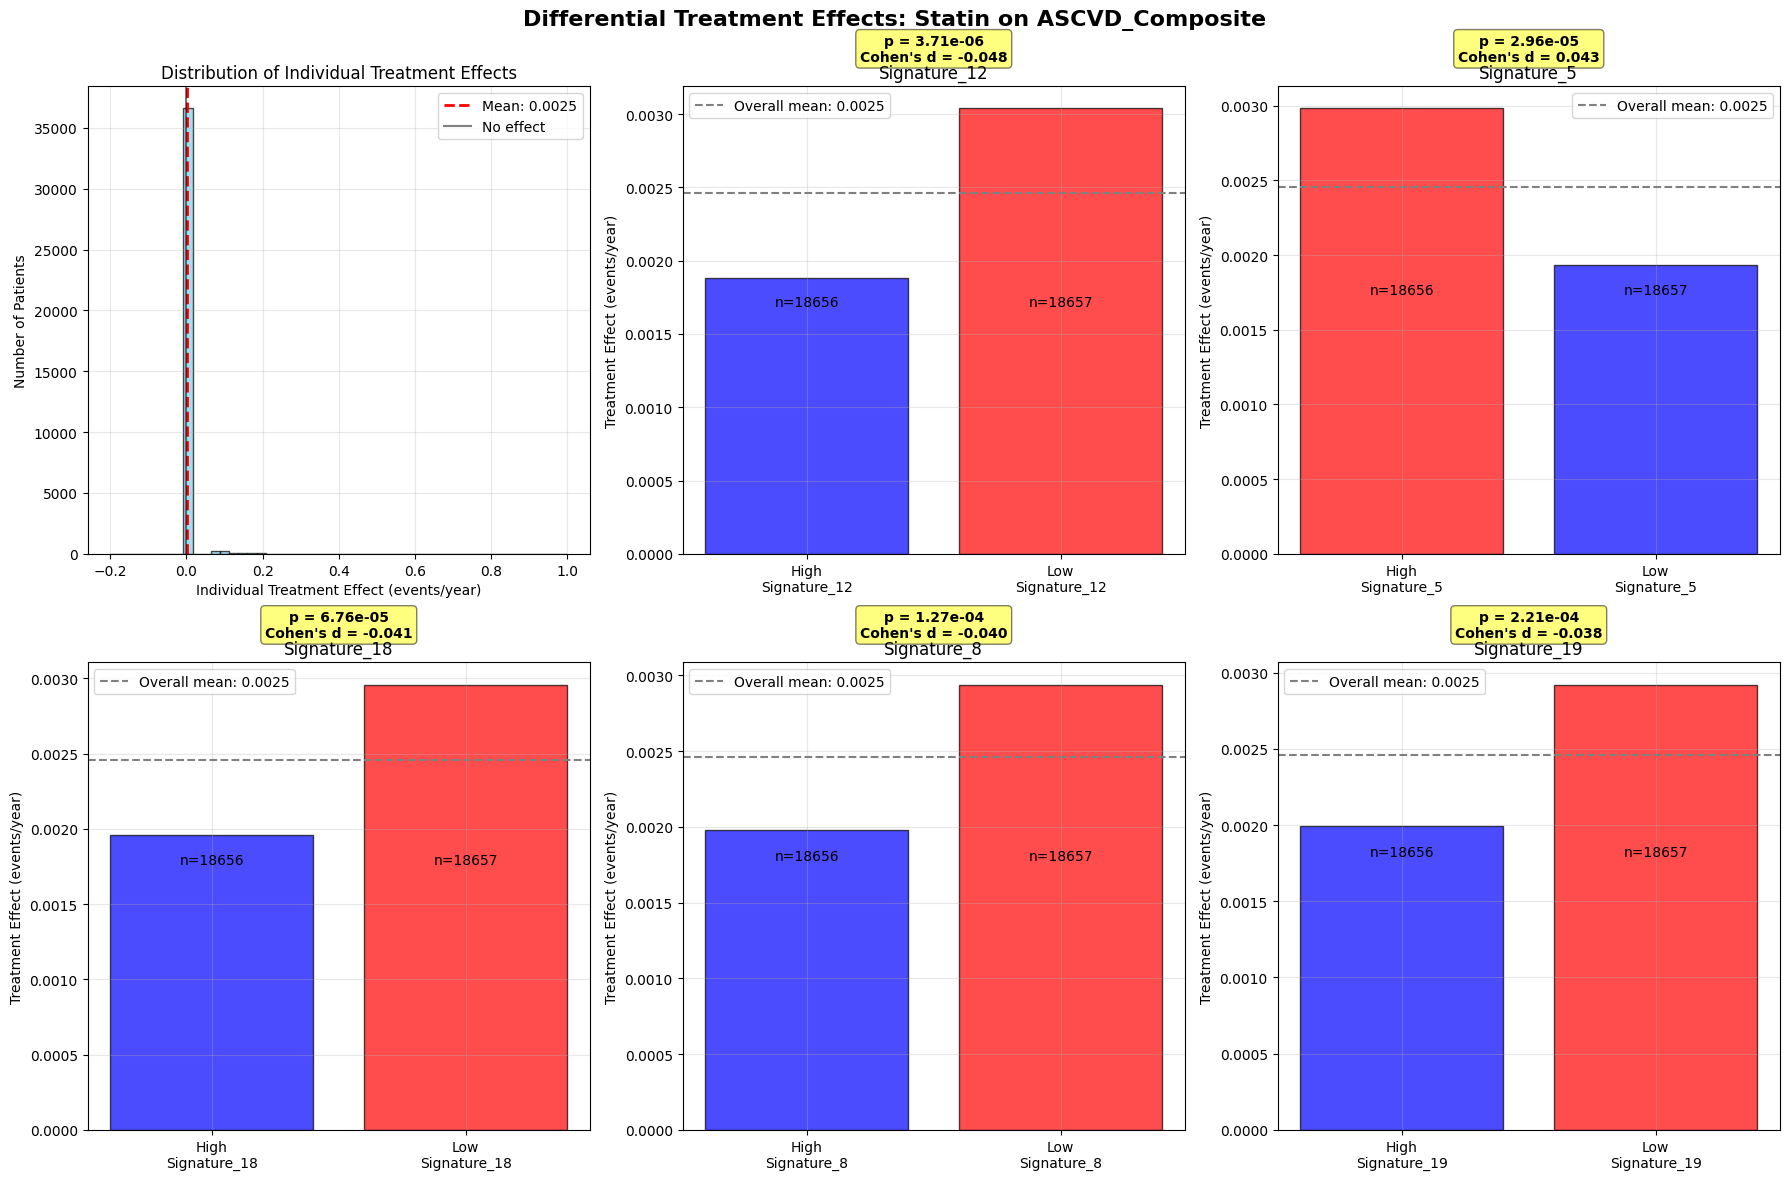

In [9]:
from true_differential_treatment_effects import run_true_differential_analysis

# Run differential analysis on the validated statin results
statin_differential_results = run_true_differential_analysis(
    matched_pairs=[{'treated_eid': t_eid, 'control_eid': c_eid}
                    for t_eid, c_eid in zip(statin_results['matched_patients']['treated_eids'],statin_results['matched_patients']['control_eids'])],
    treated_eids=statin_results['matched_patients']['treated_eids'],
    treated_times=statin_results['treatment_times']['treated_times'],
    Y_tensor=Y,
    outcome_idx=112,  # Use first ASCVD outcome for now, or create composite
    outcome_name="ASCVD_Composite",
    thetas=thetas,
    processed_ids=processed_ids,
    covariate_dicts=covariate_dicts,
    drug_name="Statin"
)

plt.show()  # Show the differential effects visualization


Loaded reference_theta from reference_thetas.csv: (21, 52)
Theta shape: (400000, 21, 52), using last 52 time points
Before matching: 37313 treated, 362687 untreated
Matched treated trajectories: 37313 patients
Matched control trajectories: 37313 patients
Automatically selected signatures by correction effect:
  Sig 7: improvement = 0.002685
  Sig 8: improvement = 0.001070
  Sig 5: improvement = 0.000697
  Sig 0: improvement = 0.000456
  Sig 2: improvement = 0.000352
=== BEFORE MATCHING - CONTROL GROUP ===
=== BEFORE MATCHING - TREATED GROUP ===
=== AFTER MATCHING - CONTROL GROUP ===
=== AFTER MATCHING - TREATED GROUP ===
Plot saved as 'signature_deviations_over_time.png'


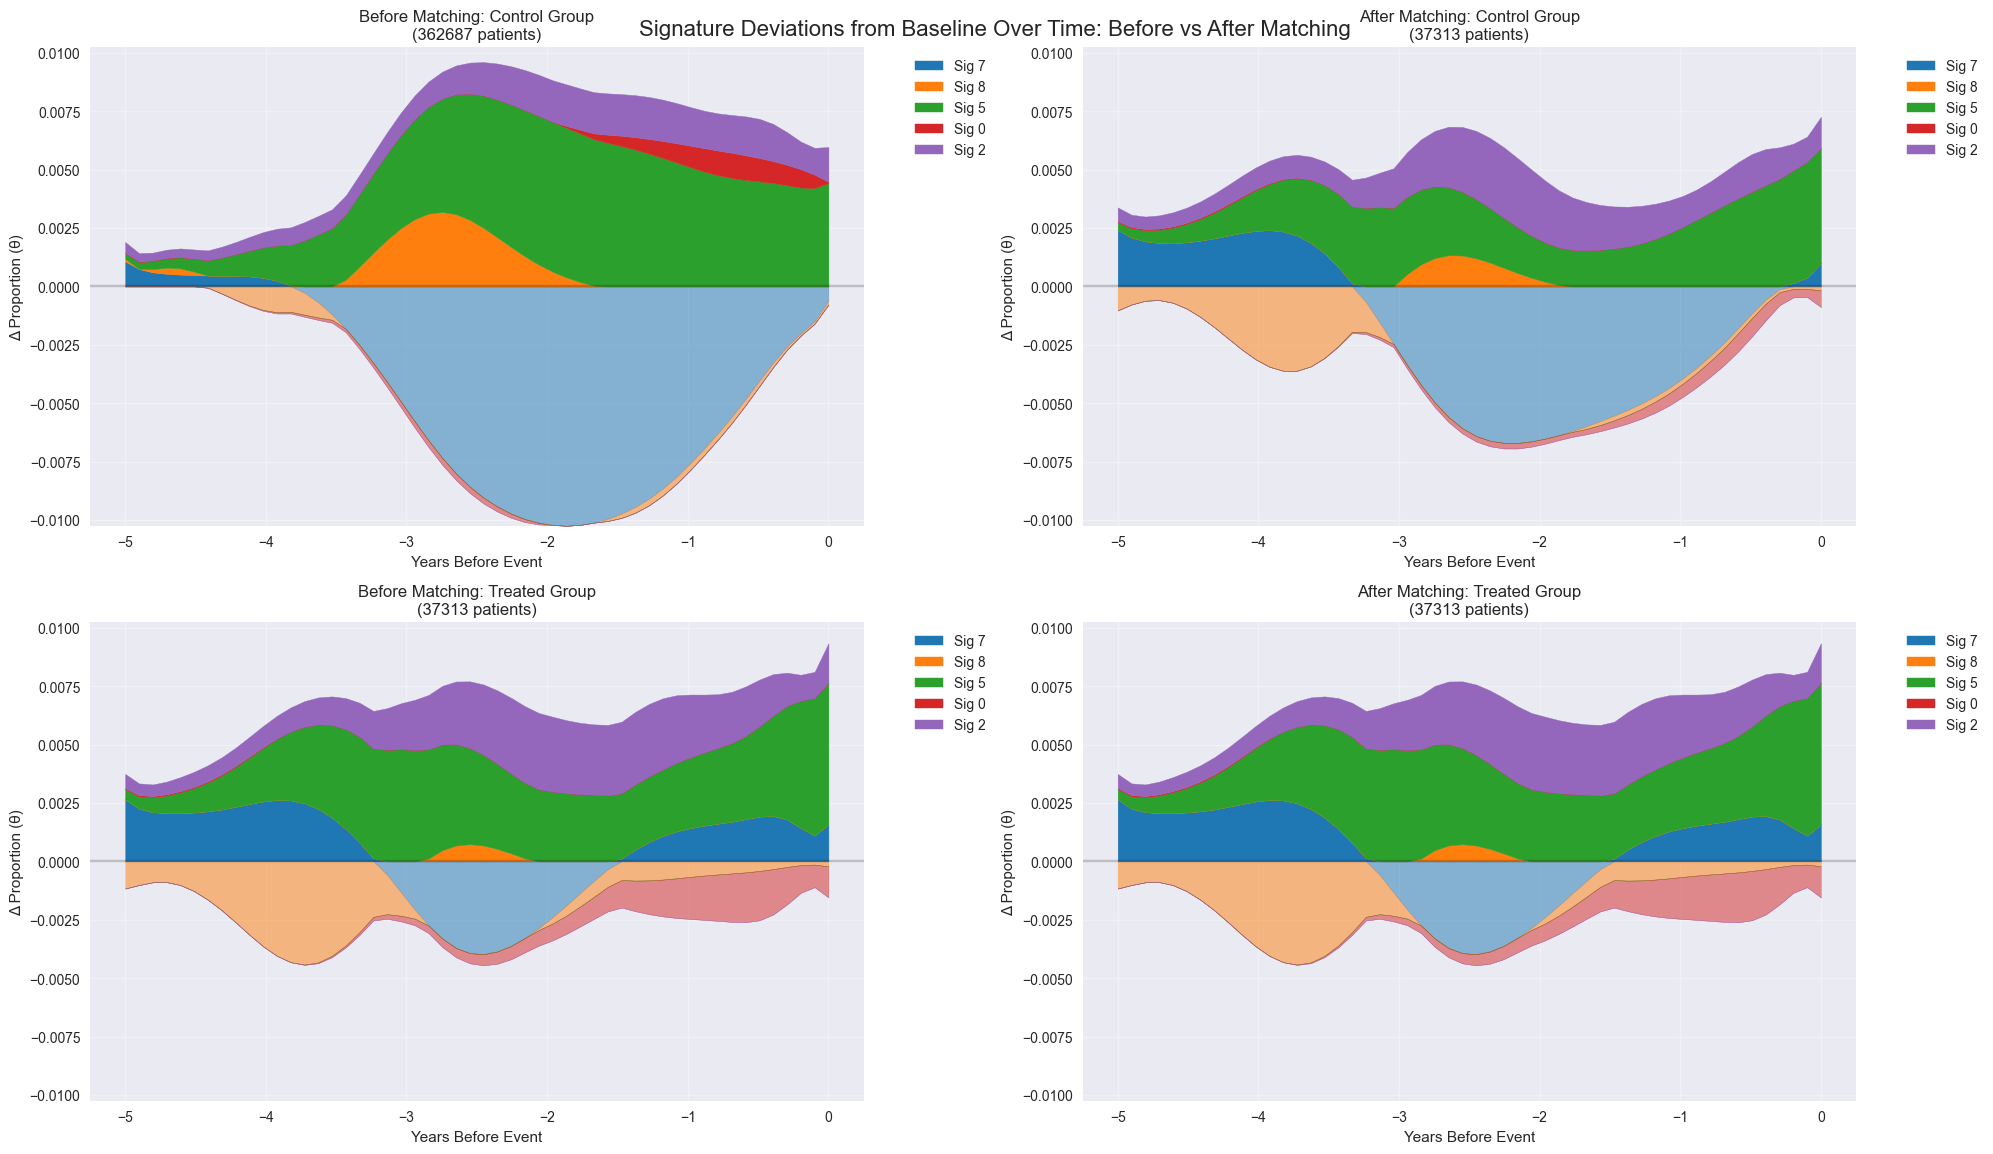


=== SUMMARY STATISTICS ===
Before matching:
  Treated patients: 37313
  Untreated patients: 362687

After matching:
  Treated patients: 37313
  Control patients: 37313


In [50]:
from plot_signature_deviations_over_time import *
# Usage example:


fig = plot_signature_deviations_over_time(
    thetas, processed_ids, statin_results, 
    reference_thetas_path="reference_thetas.csv",
    sig_indices=None,
    years_before_event=5, save_plots=True
)

In [37]:
thetas.shape

(400000, 21, 52)

## ASPREE trial

Ok now we will look at reducing CRC among patients treated with Aspirin

In [28]:
## TODO: make sure we have filter out patients with colorectal cancer at baseline, and that we exclude clopidogrel (or use as negative control)
# Run analysis
from scripts.aspirin_colorectal_analysis import *
true_aspirins = find_aspirin_basic(gp_scripts)



=== Basic Aspirin Search ===

Found 1567568 prescriptions containing 'aspirin'
Found 207 prescriptions containing 'disprin'
Found 1241598 prescriptions with BNF pattern '02.09.01.' (aspirin-specific)
Excluded 39768 clopidogrel prescriptions (BNF 02.09.03.)

DEBUG: Checking what drugs are being included...
Aspirin mask matches: 1567775
BNF mask matches: 1241598
Combined matches: 1569215
⚠️ WARNING: Found 315176 Beclometasone prescriptions!
  - Beclometasone included in results: 0

Total potential aspirin prescriptions: 1569215
Unique patients with aspirin: 39455

Sample aspirin prescriptions:
          eid  issue_date                         drug_name        bnf_code
714   1000086  04/12/2007  Aspirin 75mg dispersible tablets  02.09.01.00.00
1472  1000198  08/06/2015  Aspirin 75mg dispersible tablets        02090000
1476  1000198  16/12/2014  Aspirin 75mg dispersible tablets        02090000
1480  1000198  02/09/2013  Aspirin 75mg dispersible tablets        02090000
1481  1000198  18/10

In [29]:
from scripts.aspirin_colorectal_analysis import *

aspirin_results = aspirin_colorectal_analysis(
    gp_scripts=gp_scripts,
    true_aspirins=true_aspirins,
    processed_ids=processed_ids,
    thetas=thetas,
    covariate_dicts=covariate_dicts,
    Y=Y,  # Your outcome tensor
    colorectal_cancer_indices=[10,11],  # Define cancer events
    cov=cov
)

=== ASPIRIN-COLORECTAL CANCER PREVENTION ANALYSIS ===
Expected effect: Aspirin should REDUCE colorectal cancer risk (HR < 1.0)
Expected HR from trials: ~0.7-0.8 (20-30% risk reduction)

1. Verifying patient cohort definitions:
=== PATIENT COHORT VERIFICATION (ASPIRIN) ===
Patients with complete data: 178,317
All aspirin patients: 39,455
Treated cohort (complete data + aspirin): 36,151
Control cohort (complete data - aspirin): 142,166
✅ No overlap between treated and control cohorts

2. Extracting treated patients using ObservationalTreatmentPatternLearner:
Found 31935 treated patients
Found 142166 never-treated patients
   Treated patients from learner: 31,935
   Never-treated patients from learner: 142,166

=== TREATED PATIENT VERIFICATION (ASPIRIN) ===
Claimed treated patients: 31,935
  - With aspirin: 31,935
  - Without aspirin: 0
✅ All treated patients have aspirin

3. Defining clean controls:
   Found 142166 never-treated patients with signature data

=== CONTROL PATIENT VERIFICAT

Loaded reference_theta from reference_thetas.csv: (21, 52)
Theta shape: (400000, 21, 52), using last 52 time points
Before matching: 31935 treated, 368065 untreated
Matched treated trajectories: 31935 patients
Matched control trajectories: 31935 patients
Automatically selected signatures by correction effect:
  Sig 5: improvement = 0.007485
  Sig 8: improvement = 0.002124
  Sig 3: improvement = 0.001664
  Sig 17: improvement = 0.001559
  Sig 1: improvement = 0.001229
=== BEFORE MATCHING - CONTROL GROUP ===
=== BEFORE MATCHING - TREATED GROUP ===
=== AFTER MATCHING - CONTROL GROUP ===
=== AFTER MATCHING - TREATED GROUP ===
Plot saved as 'signature_deviations_over_time.png'


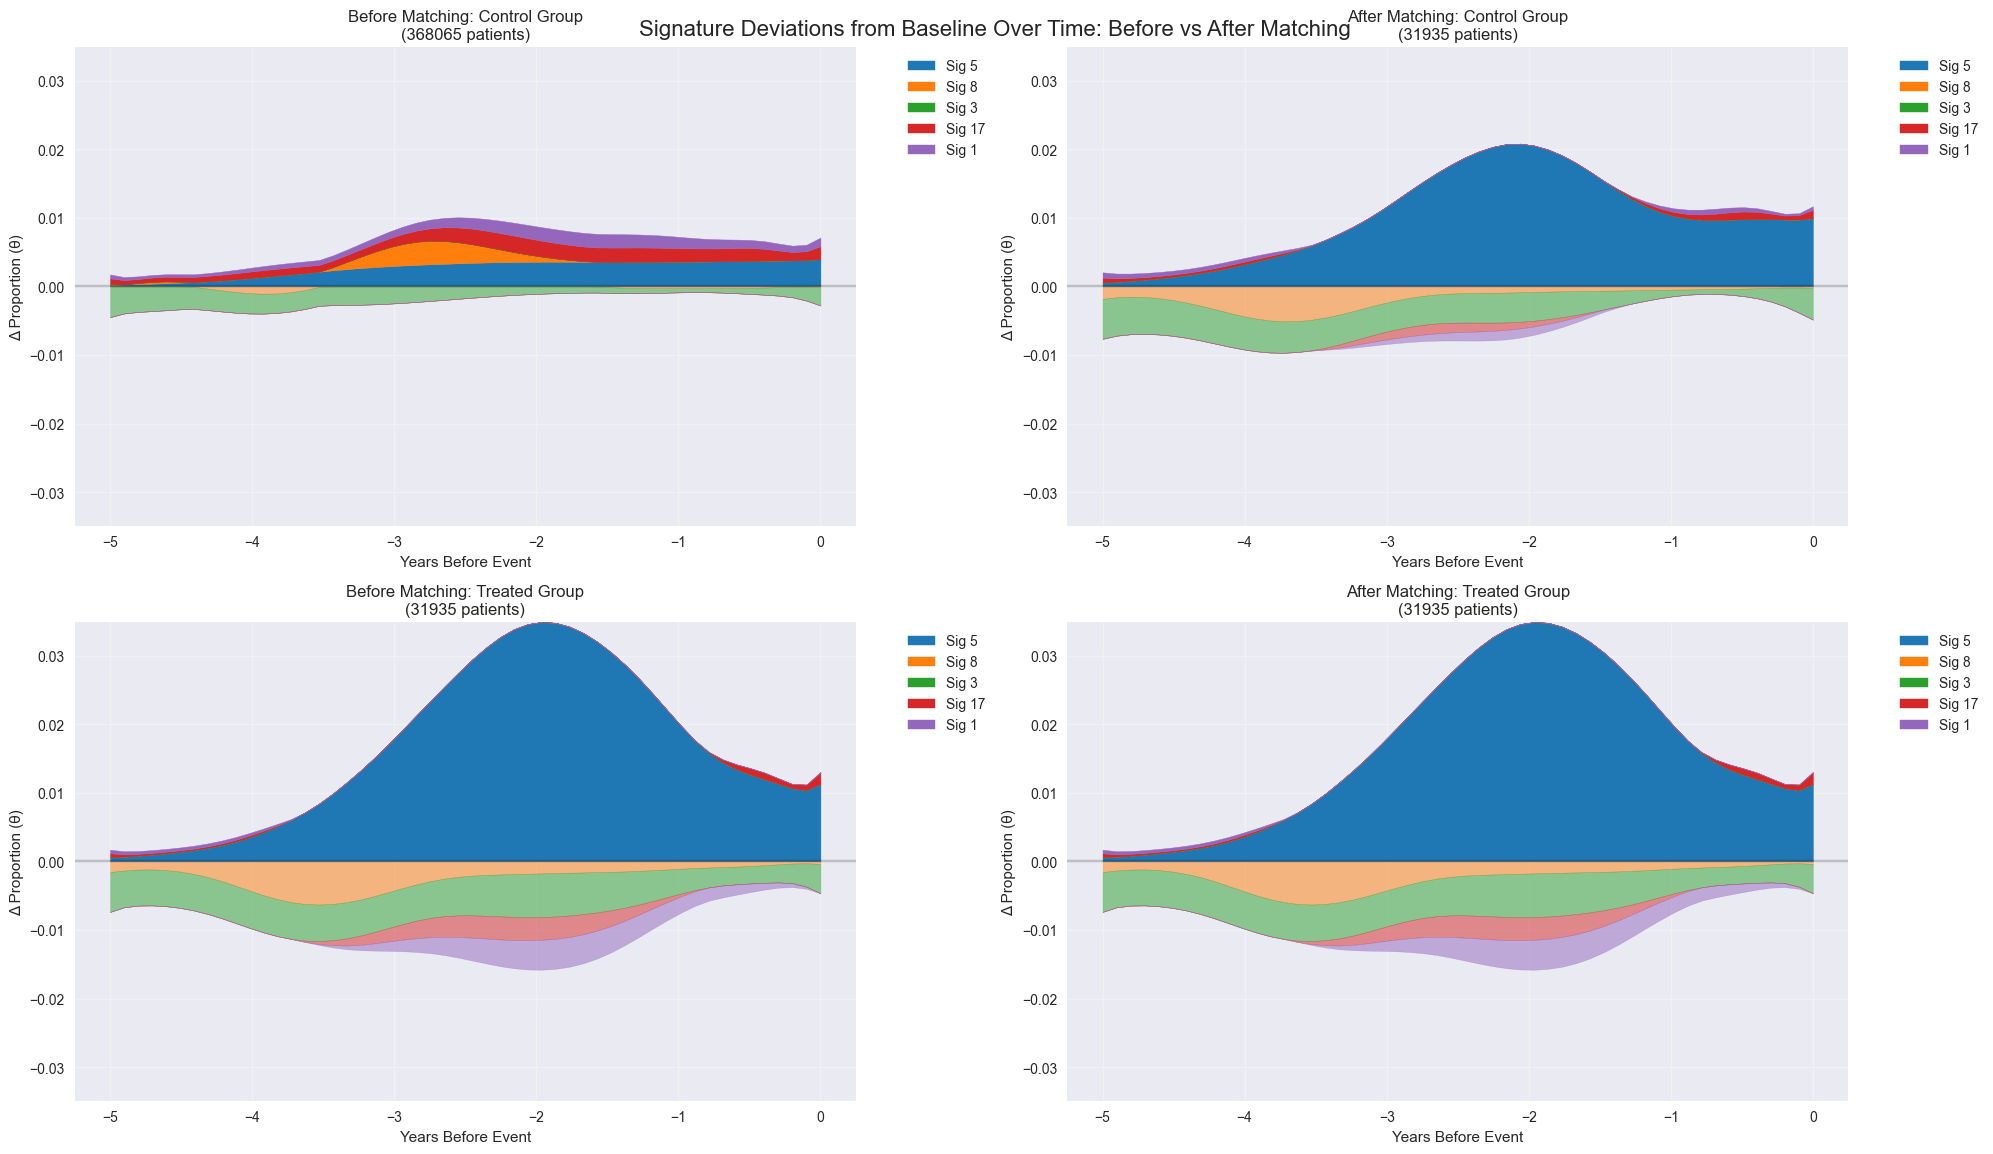


=== SUMMARY STATISTICS ===
Before matching:
  Treated patients: 31935
  Untreated patients: 368065

After matching:
  Treated patients: 31935
  Control patients: 31935


In [51]:
fig = plot_signature_deviations_over_time(
    thetas, processed_ids, aspirin_results, 
    reference_thetas_path="reference_thetas.csv",
    sig_indices=None,
    years_before_event=5, save_plots=True
)

Negative Contorl : Clopidogrel

In [63]:
# 1. Find clopidogrel prescriptions
from scripts.aspirin_colorectal_analysis import *


In [ ]:

clopidogrels = find_clopidogrel_basic(gp_scripts)


In [65]:

# 2. Run negative control analysis
clopidogrel_results = clopidogrel_colorectal_analysis(
    gp_scripts=gp_scripts,
    true_clopidogrels=clopidogrels,
    processed_ids=processed_ids,
    thetas=thetas,
    covariate_dicts=covariate_dicts,
    Y=Y,  # Your outcome tensor
    colorectal_cancer_indices=[10,11],  # Define cancer events
    cov=cov
)


=== CLOPIDOGREL-COLORECTAL CANCER ANALYSIS (NEGATIVE CONTROL) ===
Expected effect: Clopidogrel should have NO effect on CRC (HR ≈ 1.0)
If HR < 1.0, this suggests confounding or bias in our analysis!

1. Verifying patient cohort definitions:
=== PATIENT COHORT VERIFICATION (ASPIRIN) ===
Patients with complete data: 178,317
All aspirin patients: 10,359
Treated cohort (complete data + aspirin): 9,716
Control cohort (complete data - aspirin): 168,601
✅ No overlap between treated and control cohorts

2. Extracting treated patients using ObservationalTreatmentPatternLearner:
Found 7310 treated patients
Found 168601 never-treated patients
   Treated patients from learner: 7,310
   Never-treated patients from learner: 168,601

=== TREATED PATIENT VERIFICATION (ASPIRIN) ===
Claimed treated patients: 7,310
  - With aspirin: 7,310
  - Without aspirin: 0
✅ All treated patients have aspirin

3. Defining clean controls:
   Found 168601 never-treated patients with signature data

=== CONTROL PATIENT 

Loaded reference_theta from reference_thetas.csv: (21, 52)
Theta shape: (400000, 21, 52), using last 52 time points
Before matching: 7310 treated, 392690 untreated
Matched treated trajectories: 7310 patients
Matched control trajectories: 7310 patients
Automatically selected signatures by correction effect:
  Sig 5: improvement = 0.019096
  Sig 8: improvement = 0.003533
  Sig 1: improvement = 0.003509
  Sig 3: improvement = 0.003135
  Sig 17: improvement = 0.002554
=== BEFORE MATCHING - CONTROL GROUP ===
=== BEFORE MATCHING - TREATED GROUP ===
=== AFTER MATCHING - CONTROL GROUP ===
=== AFTER MATCHING - TREATED GROUP ===
Plot saved as 'signature_deviations_over_time.png'


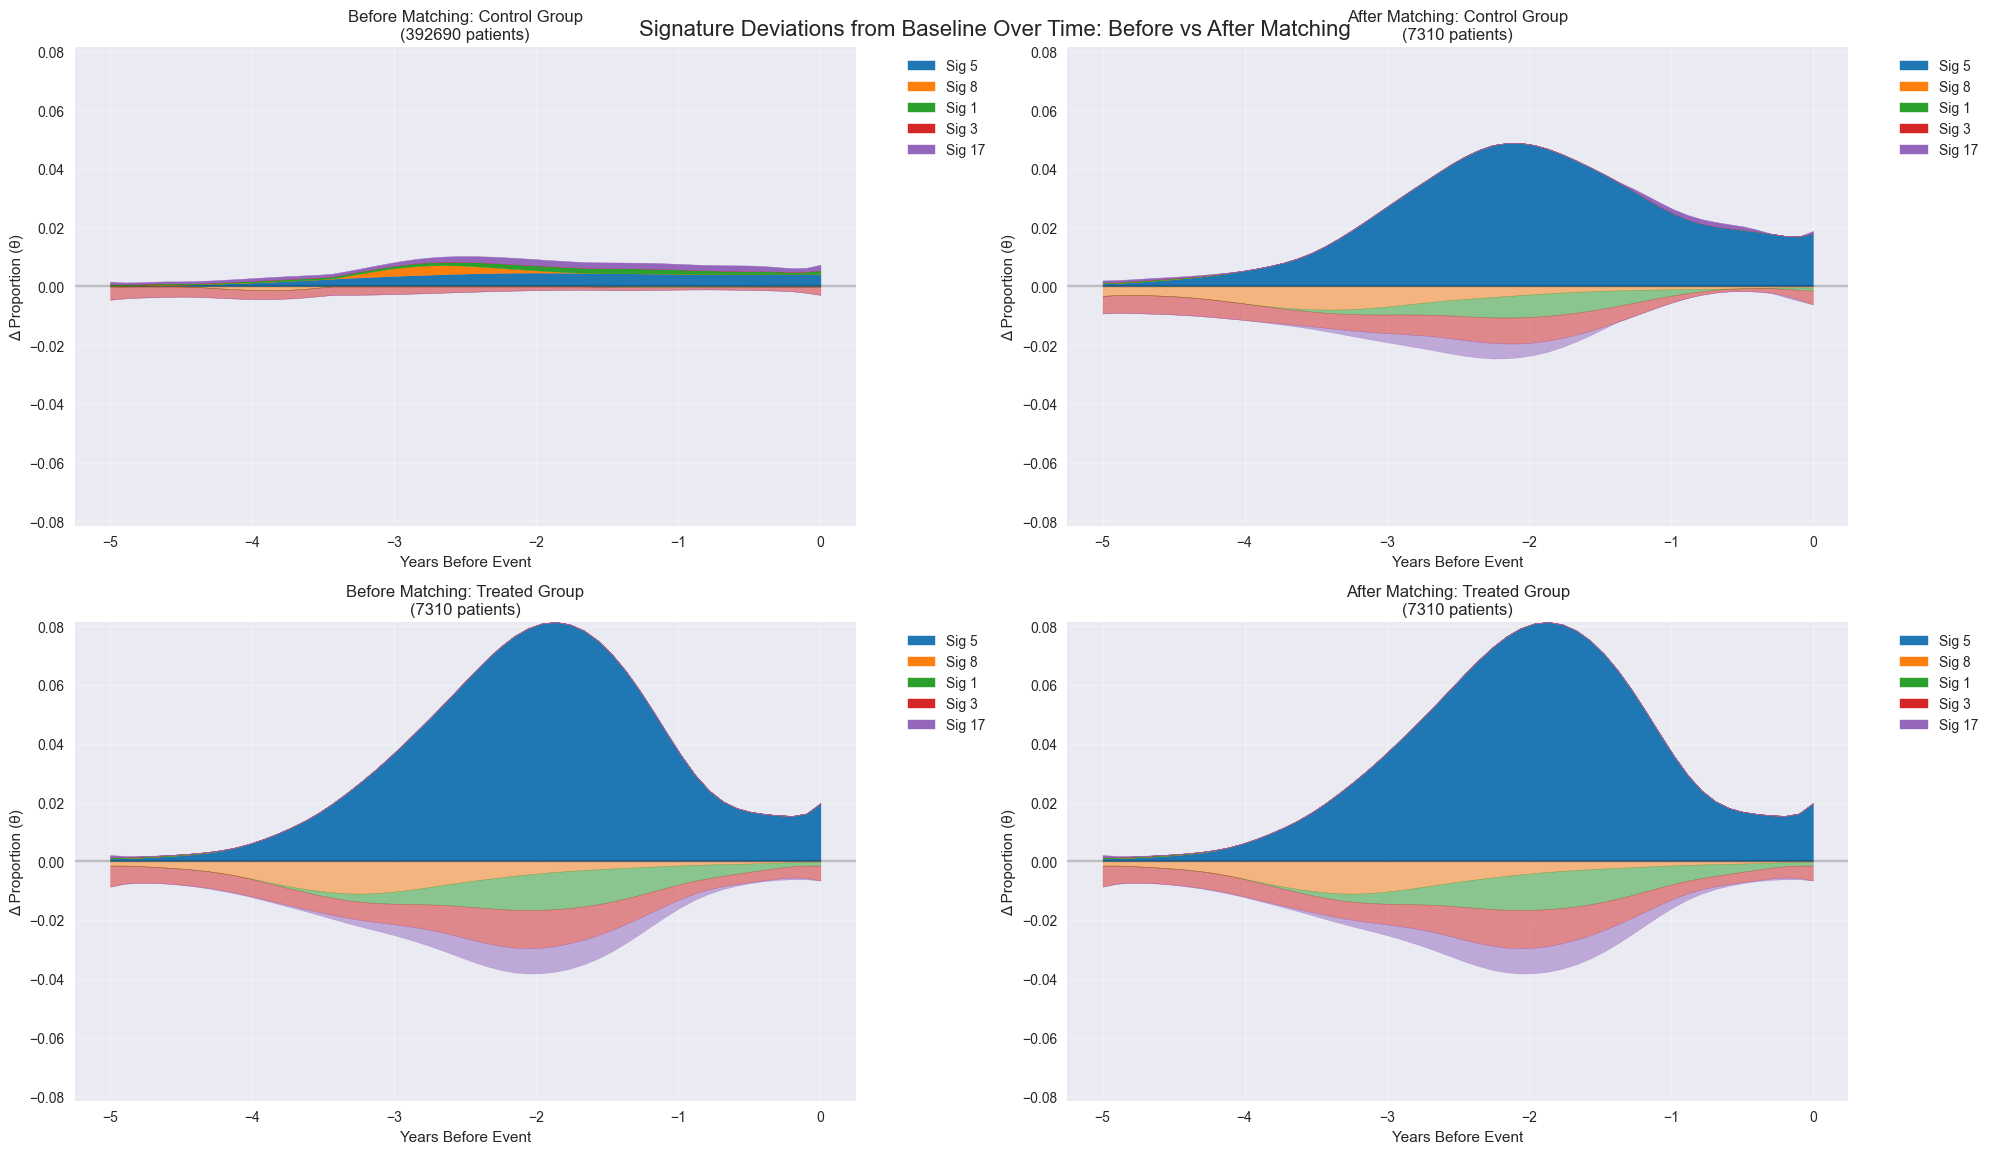


=== SUMMARY STATISTICS ===
Before matching:
  Treated patients: 7310
  Untreated patients: 392690

After matching:
  Treated patients: 7310
  Control patients: 7310


In [61]:

# 3. Plot the results (same format as metformin)
fig = plot_signature_deviations_over_time(
    thetas, processed_ids, clopidogrel_results, 
    reference_thetas_path="reference_thetas.csv",
    sig_indices=None,
    years_before_event=5, save_plots=True
)

# MI reduction among diabetics treated with Metforming

In [ ]:
# Import the metformin analysis functions
from scripts.metformin_analysis import *

# Find metformin prescriptions (you already have this data)
metformins = find_metformin_basic(gp_scripts)
metformins_clean = metformins[metformins['drug_name_str'].str.contains('metformin', case=False, na=False)]


=== Basic Metformin Search ===

Found 700404 prescriptions containing 'metformin'
Found 14128 prescriptions containing 'glucophage'
Found 255561 prescriptions with BNF pattern '06.01.02.01'
Found 15735 prescriptions with BNF pattern '06010202'

DEBUG: Checking what drugs are being included...
Metformin mask matches: 714532
BNF mask matches: 271296
Combined matches: 970113

Total potential metformin prescriptions: 970113
Unique patients with metformin: 13010

Sample metformin prescriptions:
          eid  issue_date                drug_name  bnf_code
1252  1000198  07/06/2016  Metformin 500mg tablets  06010202
1256  1000198  06/12/2013  Metformin 500mg tablets  06010202
1257  1000198  09/05/2016  Metformin 500mg tablets  06010202
1258  1000198  29/10/2013  Metformin 500mg tablets  06010202
1260  1000198  16/12/2014  Metformin 500mg tablets  06010202
1263  1000198  22/10/2014  Metformin 500mg tablets  06010202
1265  1000198  18/10/2016  Metformin 500mg tablets  06010202
1269  1000198  2

In [62]:
# Run the complete metformin analysis with clean data
from scripts.metformin_analysis import *
metformin_diabetic_results = metformin_diabetics_analysis(
    gp_scripts=gp_scripts,
    true_metformins=metformins_clean,
    processed_ids=processed_ids,
    thetas=thetas,
    covariate_dicts=covariate_dicts,
    Y=Y,
    mi_indices=[112],  # Your MI indices
    cov=cov
)

=== METFORMIN-MI PREVENTION ANALYSIS IN DIABETICS ===
Expected effect: Metformin should REDUCE MI risk in diabetics (HR < 1.0)
Expected HR from UKPDS trial: ~0.6-0.7 (30-40% risk reduction)

1. Verifying patient cohort definitions:
=== PATIENT COHORT VERIFICATION (METFORMIN) ===
Patients with complete data: 178,317
All metformin patients: 12,684
Treated cohort (complete data + metformin): 11,276
Control cohort (complete data - metformin): 167,041
✅ No overlap between treated and control cohorts

2. Extracting treated patients using ObservationalTreatmentPatternLearner:
Found 9661 treated patients
Found 167041 never-treated patients
   Treated patients from learner: 9,661
   Never-treated patients from learner: 167,041

=== TREATED PATIENT VERIFICATION (METFORMIN) ===
Claimed treated patients: 9,661
  - With metformin: 9,661
  - Without metformin: 0
✅ All treated patients have metformin

3. Defining diabetic controls:
   Found 22142 total diabetics
   Found 11005 diabetic controls (not 

Loaded reference_theta from reference_thetas.csv: (21, 52)
Theta shape: (400000, 21, 52), using last 52 time points
Before matching: 9661 treated, 390339 untreated
Matched treated trajectories: 9661 patients
Matched control trajectories: 9661 patients
Automatically selected signatures by correction effect:
  Sig 5: improvement = 0.008252
  Sig 7: improvement = 0.004225
  Sig 3: improvement = 0.003799
  Sig 8: improvement = 0.003463
  Sig 15: improvement = 0.003387
=== BEFORE MATCHING - CONTROL GROUP ===
=== BEFORE MATCHING - TREATED GROUP ===
=== AFTER MATCHING - CONTROL GROUP ===
=== AFTER MATCHING - TREATED GROUP ===
Plot saved as 'signature_deviations_over_time.png'


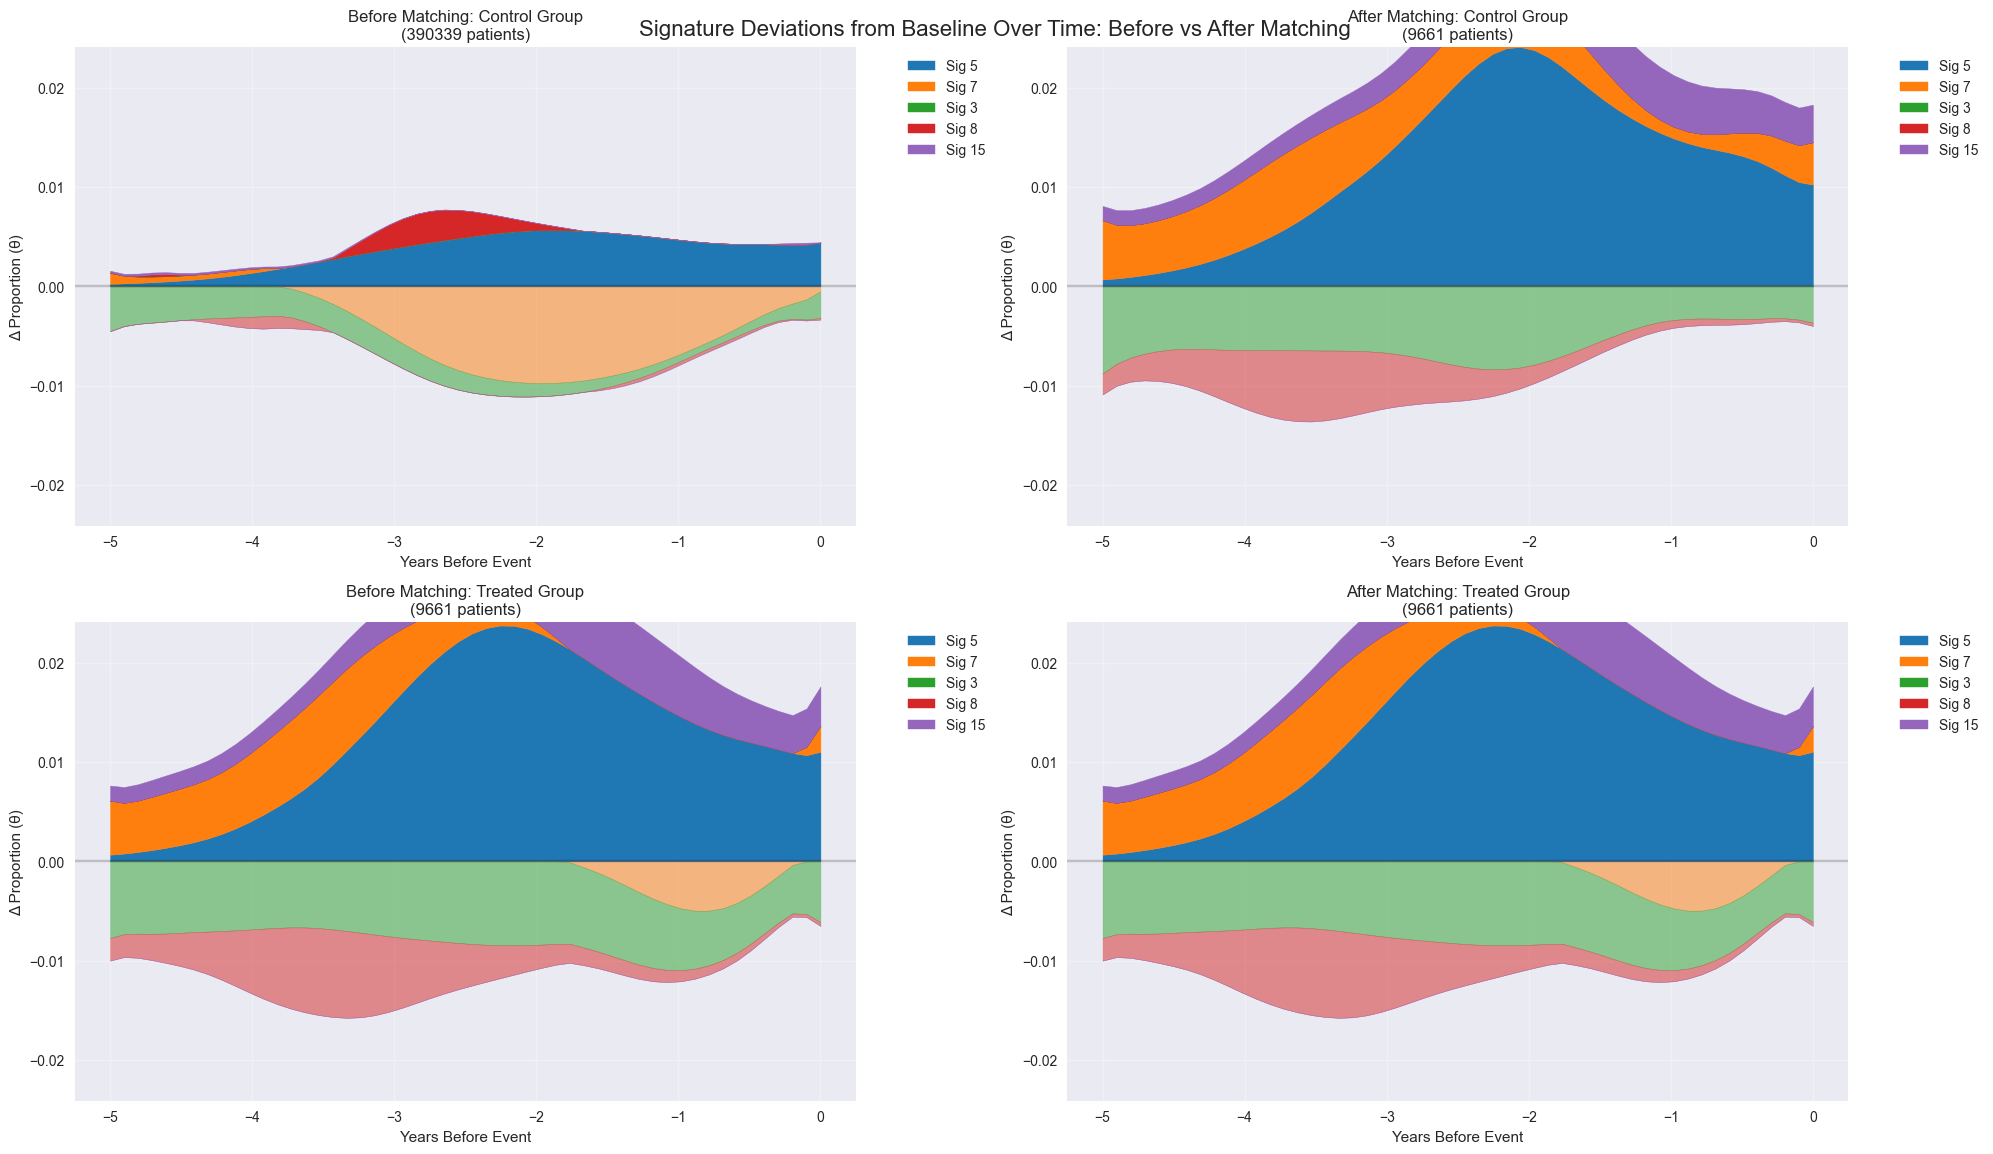


=== SUMMARY STATISTICS ===
Before matching:
  Treated patients: 9661
  Untreated patients: 390339

After matching:
  Treated patients: 9661
  Control patients: 9661


In [56]:
fig = plot_signature_deviations_over_time(
    thetas, processed_ids, metformin_diabetic_results, 
    reference_thetas_path="reference_thetas.csv",
    sig_indices=None,
    years_before_event=5, save_plots=True
)